In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers
le=LabelEncoder()
from glob import glob
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,array_to_img,load_img

In [2]:
path='D:/datasets/plant-seedlings-classification/train'
impath=path+'/Black-grass/f0a7c51a2.png'

In [3]:
os.listdir(os.path.join(path,os.listdir(path)[0]))

['0050f38b3.png',
 '0183fdf68.png',
 '0260cffa8.png',
 '05eedce4d.png',
 '075d004bc.png',
 '078eae073.png',
 '082314602.png',
 '0ace21089.png',
 '0b228a6b8.png',
 '0b3e7a7a9.png',
 '0bb75ded8.png',
 '0be707615.png',
 '0c67c3fc3.png',
 '0d1a9985f.png',
 '0d28c429b.png',
 '0d4f74f4a.png',
 '0dad57e7f.png',
 '0e91f92a1.png',
 '0fe440ed5.png',
 '1276dffba.png',
 '129c51855.png',
 '13a7f553a.png',
 '14719a83e.png',
 '1576ce9fd.png',
 '163c13912.png',
 '163e571a6.png',
 '16c69a6d8.png',
 '173cec485.png',
 '1a125880e.png',
 '1af1eddd3.png',
 '1d39b8f30.png',
 '1e49633e0.png',
 '20b2cbaed.png',
 '20d4fab57.png',
 '2269e0a1e.png',
 '228d8ad5c.png',
 '22be204a3.png',
 '25daae389.png',
 '260c4eed3.png',
 '26103af9c.png',
 '279ac215b.png',
 '28a707630.png',
 '2aa60045d.png',
 '2ed589264.png',
 '2ee4dad8c.png',
 '2f0ae1b34.png',
 '2f6bc240a.png',
 '3002e5d9d.png',
 '31958c132.png',
 '31f2766cb.png',
 '32d97b170.png',
 '332f68a21.png',
 '34a672a63.png',
 '355cad34c.png',
 '37d85d833.png',
 '39e9bf4c

In [6]:
def greenmask(img):
    imm=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
    #imm=cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
    mask=cv2.inRange(imm,(25,15,15),(75,255,255))
    green=cv2.bitwise_and(imm,imm,mask=mask)
    #green=green.astype(np.float32)
    #green=cv2.cvtColor(green,cv2.COLOR_HSV2RGB)
    return green

In [8]:
classes=os.listdir(path)

In [9]:
def getimgs():
    trainds=[]
    for i in classes:
        for j in (glob(path+'/'+i+'/*')):
            img=cv2.imread(j)
            img=cv2.resize(img,(256,256))
            green=greenmask(img)
            trainds.append([green,i])
    return trainds
        #plt.imshow(img)
        #plt.show()data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAQYAAAD8CAYAAACVSwr3AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjMuMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy86wFpkAAAACXBIWXMAAAsTAAALEwEAmpwYAACIAElEQVR4nO39abBl2XHfh/5y7b3POXeoubrR6G4AjalBAgQBkA2QAAcBoikOoh4oyXqPtCXTliJgOcj3pHiSwpT8QXofFCE7ZFp6gxWGQgxTlkSKtsQn2HokBYLzAGJiY2IDxEig0fNQ0x3O2XutfB8yc+1TXd3o6prura6dFTeq6twz7LP3Xrky//nPf4qqMtlkk022bumgD2CyySY7fDY5hskmm+wSmxzDZJNNdolNjmGyySa7xCbHMNlkk11ik2OYbLLJLrHr5hhE5PtF5LMi8nkR+cnr9TmTTTbZtTe5HjwGEWmAPwK+F3gQ+DDwo6r6h9f8wyabbLJrbtcrYngb8HlV/aKqroCfA959nT5rsskmu8bWXqf3vQv46tr/HwS+7bmeLCIT/XKyya6/PaGqt13OE6+XY5BneeyixS8i7wHec50+f7LJJrvU/vhyn3i9HMODwMvW/n838ND6E1T1vcB7YYoYJpvssNn1whg+DLxWRF4pIjPgR4D3XafPmmyy626LjXtp25MHfRg3zK5LxKCqg4j8BPDLQAP8tKp++np81mST3QjrujsoZR+Gpw76UG6IXZdy5Qs+iCmVmOwA7ba7f4LHH/wnQH7uJ0kLWoByow7rethHVfW+y3nixHyc7JY0SQtEZjTNMRo5xm0v+3Ga9iSSNp79BTpwkzuFF2TXC3ycbLJDbbPFPbTNSba33k6jC1LTcerOv8y5J3+J/Z1PHfThHbhNEcNkt6SVfIGtjW9hlm4j5ZaUE8PuVyn5HE136qAP78BtihgmuyVttng53ewOZGgRTWQUSqLkPbSsDvrwDtwmxzDZLWsqQpEGVFCMgTf0jx/0YR0KmxzDZLek7Zz9IF3zUhaLtwDCUB7i6ad+/qAP69DYVK6cbLJbx6Zy5WSTTXblNjmGySab7BKbHMNkk012iU2OYbLJJrvEJscw2WSTXWKTY5hssskusckxTDbZZJfY5Bgmm2yyS2xyDJNNNtklNjmGySab7BKbHMNkk012iU2OYbLJJrvEJsdwE9v8yMuRNDvow5jsRWiTY7iJbfPo6zh+6j9iuoyTXWub7qib2YaGjdlrOXn6hw/6SCZ7kdnkGG5i0wxFM2ee+sWDPpTJXmQ2KTjdxHbmiV866EOY7EVqk2OY7Ja3+e13QAJBQdVGMrdAB2XoWX316YM+xBtuk2OY7Ja07vRtzF9yB6KF7de8liSKyIBIQTpFF0o5ogyyZPejX4O+RfsGsqCrzM4fPXDQX+G62uQYJrulLM0XHHvH22mPbtOdOEIqA6KFpAUSpFlBWkVbpcyUZpGYfdfrYHeG7reQG8pSmd99iv2vPczuZ79w0F/putgkBjvZi9oWL7+HI295M8wKtJCkoTl6FJFC6gaSFJCCCKSmILNiY5gFtIEiIKsGhoQqNqVuEIoUhmXPsLviqf/jdxkeP3Og3/My7bLFYCfHMNmLyiS1kBK3f+9/jCxANoS0ITAHZoXUAJ0iC0USiGKPtYq0inR+K6qgjaAtSC+wSmhS6BSagpaCrpS8L+R95dH/1y9RdpfocjjAb/+8NjmGyW49S/NNTnzzu1jcfgrZzLBQ2CqwoUgLMgOZi/3dCiKChFOYKQwJQaABXSgsMCByEEAhqU2lWYJmRVUppVCWSu6F4dweT/2z30aB/OQOutsf5Ol4Npscw2S3ljWb2xz7pm9n4447SZsDsllgAbJVzDnMBEkJmQnSCqkkUIEO2FBoFFk2oAnmChuKLrDUQTGnANDbj4qiFLQt6FDQJZR9KF1BFXZ+9Qus/ugp9v7gq1AOze192Y5hAh8nu+ktbWxw7K33sXHX7TTzHtkopIWgnSDzBjYFOiElAQRpBMEdgwCDQsYciSqIoIMgO+IfADRqGIMCM0VSAUlW5pwL2gGiSAGycuQ7Xk35ltfQnTzBufd//GBOzFXY5Bgmu6ntxHe9i2a7Y3H3CdLGQOoEaRPSWWTAXJEuQRJEBUQQBEn4ggdVgSzIdrYIoRf7W8QcQavQWNqhqIGTJRnvIdncS0mQZsBK0VyQopAL2+94HcKCs+///YM7SVdgk2OY7Ka0Y9/6djZe9lK6k3NkW5GtYgtTLBoQSQYydtRFTXHn4JGCFOcziVgKscRSBgFpFG0yZO8aCOJTA/YE/EeQLFa+aLEIoitoVyAVZChsvfmVUJSzH/jQQZyqK7Krcgwi8mXgPBaIDap6n4icBP41cA/wZeD/rKq3HnVssmtvImy86lUc/47voFlk0mZBFoU0E6RtDD/ojL0oGgs82e7vWIGoQCMWBSStQQGq5hg6bMEXQXpBxaIFikBRBHuOtgoqyMqciiZBWvscLQmScyOGjGZl662vYbiww87vf/qgzt4LsmvRRPUuVX3zGqjxk8AHVPW1wAf8/5NNdtW2ePUrOPGnvo3meE86mUm3D6RTBdkU0qxBUoKUkCYZjpAEKSD7DbJKSHEvMECtMgSoWNb/Dbq0HwFkAFmBDI454FUOESiNER7ahHYJnSVILTJrYbNBjjWkE0Lagu70NrK4OfQzrkcq8W7gnf7vnwF+Hfivr8PnTHaL2OJlr6DZ3uDYu76FZnMgdQlZQNoQpANZCjJgu/y+A4Kx5amaI2iARm3njyKB4ICi2haZSo0W7E3UHsvJHhtAkqANkEGz5ROaMDyiiL2PCLRWFgUhFdA+s/mOV1Ekc/79H0eXh66UeZFdrWNQ4D94ufF/UtX3Ai9R1YcBVPVhEbn92V4oIu8B3nOVnz/Zi9w2Xv0qjt33VtrtDpFM0kQS4xvIfrLd3HIBJCn0reX8TRnz/jbbgs1YSgEwGNQAGNjQMJYmC0jy14TDKAmywNJflP13bYHGUgmy/671v0tj1Y8WUgtsDGx/+2tJssGZf//bh6mMeYldrWP4DlV9yBf/+0XkM5f7Qnci74WJxzDZs9viNS/j2Du+mXYTUts7liAkBBkSAmhvt44AzIst6GLNTuRkiz6ISUFpbtQWZSxuxbsr1yIIbOO3aCKBKhoRQTgXUYseWo8sGgyPEKAXpLewRZI/rsZ72HzTPaSNBU/9/PtvwFm8MrsqjEFVH/K/HwN+AXgb8KiIvBTA/37sag9yslvPZi+/jePffx/t0RlplpGNTNq2yoPglYCVIMuELBMsE+w06L44L0GgT2OUsJY+IE5tTgo9SJ+QHsiOJ2T7YcAiBK9WyKLAxgDzjHbZ+i8adwqdGtNypsZnGLxsMQPmCdlKpM2WtBDSTJm/8k5O/vD3H8SpvSy7YscgIlsiciT+Dfwp4FPA+4Af86f9GPDvrvYgJ7u1rLv7JKd+7DtpNhOpK6RGaCSRspAakJKQnOzvIgYqRuWhYM6gKTAfoPPF26jt7F0xx1CsJCnJHUFEEyux1/tzyADWH0GXkaYg4mmLqEUkKAzFQU2PXoIv0Tj1ep6QjUTaaAwfmUGztYHM5zf8/F6OXU0q8RLgF0Qk3udfqeoviciHgZ8Xkb8CfAX4C1d/mJPdKjZ/1e2c+svfSTOALJSUEqk3XCEFEQlxvkGkCGILFQxX6BxjaEstS5IddEz+WhUjITWjMIsUcdxBx3ShtQoEjT2sg9hrVlg04OmGcSEUNhWa5FUOjEKNg5GpsfLqUmG/0N1xgqNv/3bO/vpv3MhTfFl2xY5BVb8IvOlZHn8S+J6rOaib1TZecg97j30FtDz/kye7xDbe8DJOvPtbaRHSTEgqVnpMyXobSpCXsIXvC1zVHYRt1ThhYYwSYvcvyX7fFQcsZaxWuEkyrhOBNUSfRMKcSdaalmijSErOhvRoZAEMgqhTpvuRbal4KXVmUYu0FoEcRpuYjy/AZiduY/OOVwIJFSPH2E5k4NT8tjuZnbiDs5/54EEf6k1nG2+8h+Pf+820846GhKiDjK0a0JgbIycF9yDAxOSLchCnMOvFz+mDohim42tyskWMoEltvYtTnsUWrKhYdND5B6pU0FKSPxes4WrLyVDZWrYdDTEsYmX/Q9zZSbb7JymH0SbHcBkm85ZT3/8WmgvHaeQYUhqkyYgUdEhobglsfPOOVzLbPmEhK4Jqy9Of/AB5/8LBfolDbIvX3c3xd76ZbqujSdb5KNqQslgr9OBUZjyn92JDbPoSXALw8iG2gEMaQbDIobWFLJFWAPTJ0oONwTkIDibOnNOwnwx3QJCZmiZD9rdVRVsTgJEFaOesynnQrk3PgUWpFQqSOzCvXizuvZvFV1/J/me+dP1P9AuwyTGsmbSJ9tQ2p37oWwxVbhShQCM0ewuEDbupwBpz1ECvkgfPP036pz151OvmDdAye8cPUxbFbyLbic787m+xeuwxuz9LPqBvfPA2e9ltnPw/fRtt05CSsQlTssBbSrJmJdFxwfriVd+pI3KwdgffwT1jqEVwxbCHmYf7gzkGbRQWa4QG0dGBRIsE6hUQ018gBeMRq4AkzGGgyI6gR/w4W4ENxjQmApfiTsMbvNLxGWl7cYPO9uXbLesY2uNHKEMPOZM2ZqDwkv/822lSY4h3joVvd51ohzQdycNcta2HomrPjQsOgNhNqaBaSMXCVO0SiqAFTr3jXbBqyMsVT37wFyn9krK/PMAzcuOtu+sUp//iu2iyGo9IEw2JpO4QECMnBVtxPL0YQBirzT2AN0CRQBpPA2RtkRd1+Mef36itgOKlzfAmkS54n7V2GWnUdvvsr2t8gyiCZkVWOnZeDgqrMh7TKhkmMkjlQsiGIrkgIjRHFkjbosPhUX+65RzD7PY7SBtzTnz/ffQXHiOfvcDW615KGoRm1iALLzHlZIiyYrnowstjInZfZqGkRFJFB2fF1RvWb1AplnL0Ce1d9ScrOoQfUZp54vYf+AH2H3+Isx/6KHln9wDPzo2z+Wtewsk//13uFITUOKMxG59ZhsYitoTt8IO1JNRdHRzxp3ITJEDCSlH21MHBRcV4Ctp73q/uXApWWQitx7WmK1DYyHZ9h+RsR6xa0QmKICvQmUJbkB50aRGG4RQJ6RwoHZox7ZlZx6d0hSPf/kaWn3+E1VcfvjEn/zLslnAMzdYRNl75GiQVNl/9Gpojc9J8SXv8FHLXKRKJNE+kVpBFsg47xEguWWqpS7Lnh0kdIW9G5NpFQhVF1Hv1u2w38Y6gS0FXYk6hKaQMpc0V8Nq4+yXAW+gfP8OFBz6D5hdverHxxpdz/HvfQpuFRswRJxXS0JhT9tp/nGcCdATbqQNPmAEUSxFsDY6gZPz4JqzJHIcOAlnt8YjwLFyxjknBKxjuWHyF6K4taraLpSC4Q0GdAu3Ht2OVC5Vi94oozByQlGBCSr2XJBXrBD0ESmrr9iJ3DMKJt/9J0vac+R2nkS5DV0hSTMxjBqkDoUEkIV1CUmMhY6tWMx8wRFpxLvzaTQrGiMOiALIx3qRPlkq0+K61BlwNkDzHLcVuIMXS0u1X3Em58y5mtx1HS2b15BkufOqyWeY3hW180z0cf9c308ncCEszHFNItiPXmr+M3IG4S/3XYz2RMXeP3xVf+JWI4BHCvNQAoNKaxdODkGZayvg+wZjMwKqFcx16xCJAsN9pD8wYy6XRfZkcyyjJ0gjwiCPuGzH8pC2k3lKRI2/+Fp56/APo8nCkky9Kx7D9jW9k41WvQjpoTxy1UG62QmaF1Jr3Tm1LSmrCoBF/zgRo7O+uuFdfo8aFyEc4eFXbRSI19EYcmdnOIwkrlzkgJp0j2oNYv34RNDeGO6iiGXRV6F7zEvJKyadvZ/POezj7iY+zfOTwhJlXavN77+TYn34zXeqMhiAONnp0IKlYKQ/HFIZUUwcVLzNmPEJLY5RAQRuvRiQD/2SWTSxlmZDdFhWBzgHE4jt5UyxoyP7/wBka013QDKPnsRSywkiKgaDY63WJcyL8GAagVwMtk8A+xo50HENa9ZJpIc0L83uOIm2y9zkE9qJyDLNTd3Lqbd8DWxnZFtJCkdlgGn2NhXxCQkpnMwSc7WbiHXiY6umCl5okKSyyLfC9NXBRBIrlqdpYSAjqsmBSGXXrOx9qwKVJkAuaE9p5NuLVDl2YpkDqCk3X0G3NmJ14O7oC3U+snt7jyQ/9MloOD1B1OdbefpyTf+G7aJvim7KQXJW51vc9d0d8YVVs0Reu+KKOLsbOmY3r6ZzzF9T7JwRGp1HBQccKAtRU4EKqZUga8bRCx6ao+AH7/OiN6JuxrTsHCOpp54C9TzdAbu15K48m5zgWlRHZR7byRUSrg7YXjWOQdsbxb34b6YiSNhXZzshRhVnyiyu23kuyHC/kw1XsLMxcQrzmejLeCHFXBCodOWj2ECHZTiADtjM1XtJyoEny+P94X2kw6m7sVgXovMSWBDSRetBeSYNQeqXsQmqPcvLN7+LcH32UYe88mg93Xz8AAt1tR2kajKeQEilb9cFOse/+Lo1mzrZYxBWLbXDwr2d0EoKd+3mBZTOChV6xkOIg41xreiCFEcgspv2ogr1vOJymrDErPRVosz0WuJNgUUAWW+SR2hSBfd9cAix1cJRG7XgGZ1AG6JkKbK8OFdnpReMYVAf29j7L7PgbSVsgRwQ5Il5WshSgNsosskUKzpaTzm4e7QxwqgQYtXBS9uymixJkvdAkq1gE264x1NvITTrudAlUxUteQBG0TWPNXanzDaozKo2Jj3bqZNpCXoA0ha32NItTP8j5L3+G81/8+KF3DhtvehUn3/1WT928GSo3VHGTKDk6CKcAKVu0Bdb5ODDm8PNslzRjwF9XLFIb0tgw5SmHdJaKGORg6s+IO4ji0m3BWxhwarN3TopYZ6WoVSZatWPo3aH32Aqa+6YyLxZV7hlGZdiIwJ47tFbNSa2AHY8qeu8Obam+5TDYi8YxHP2Bb+TIG15D0oxsNqQtgU2T+AIx9lqUEWtzi10JFUspbDfAbtDYyVFr781EemiWioWJxW4yjRtqrxsdQqQQAXY12O7iUclabEKk1YFlyDKhIsiGf7AKTbKUqMzsxj06u5e00TLs7HHhCx+/vif4KuzY97+Z1FiXZGo8W1cjMImKEb98NFxortKa/oE4HiDxuyzQFovE+oSuxFquffc1lmOx677y9GCdX5IcW4hypLg+ZINXozwV8XMepCmZOSiyEndQlorSYRUNFDYKks1JKdjGU/z5LejcRuEFfVuasdOT/TQ5huth2/fdQ+obpGuQo9biStPYxUPWFqc6Px5Hsf1qZAMSzRX4fIBki12XjTkHtXBBiqcI/lzEW277xkJaKaMYCH7/JUU1jS29NVWJHXItc/E2X2nEOwX94ZlaFaU10VPpMkc2XkFZKs1mw9lPfux6nuIrsmN/5i00MyVJIbVejlTxPgHsNLSKNiOQR+OYUPAJvIvSFJ4VloLMx2ICq3g/RUOARRXp3cm29jm1t60ple/gsQq17wKqjFsVhk3qjsqdWuwSTbFqkwiyJ4YjaDg9GfswNounG9i4uw6LHBq1VOncKOpyWOxF4RhO/6ffSaKlOZJIi4RsJqT1OH2Gc9o9/Bv84vggU10lu/BHMuzMxp79aMTpgSY7uOS7SBBmko5KQIO44xnsjo2b2m9+ndsWJaUZgbIIYaMsVsTQ9gAyo9MvqhrqOMdcjeTX2m6XloWjR1/O4rV3cO7+B9j74pdu7AX4OjZ72QkSpaovCXhVAKOHx44a6VfCIgg1Pggia5UItfQiJzQHtoMt4tmII8TMBwmeweAbg4OLGo5BsJK0H4+21I5Nsozt2Q0jwFlLkY2VNxtPEYvAOb9Qx61/gl7RziOLIpVOb+mOA5MrA1B1nyliuCaWEkfv+2aOvOmVNCeg2WyQI6bOK8nZc6vGBTuKocgrkPNOYHJgS1ZqOePKckcLK7WCYKB2A3sXpQ6W81tooeMO5uFjdOWtldE9x63gwQhggeXS4ouj+I4YYW2ENVEtbSxawLkVMs82w2CZkA1h3jec+N63oO9fsf+lrx34jXb83d/K7Pi2D4Fx1WZNdZisnQF3rL3txho05XUgsLd8XtY31YLtuiHg6k5BECsTRtNV42ldVByKR2saDiDYjDqWG72fRSN39EiRwZ1Ug1WqWmDhHz6oYR8UI14FgSmOjbinIk3BqloBSkZUeEjs5nMMIsxO3sb8pS/h6DfcS7OlpCNCOtLArLFpxwu1nPB8M7LkBDv5MyBlu9grzGloQrKgybem2GkiVA2soOi426uOGERiTCecfFPpuZ4b03tOGTuSYnXtQLS936KCZcnLoOI7pPjCaTFl5EZMhLQDnYNsgvQZWRZO/fB9PPm+wv7nD477kI5u0G7MaRM0TSJpY1WISCMC0wGCbWgFADV5teRRhYug6MxTvKhSFFv40oXTdQyg0tjxa68j5oO9Hz01tHco4aKFWVOUACyLWvaA1ql267MqKm4VOATm5PWZDqeArPzYBvsg7Z1bccjspnMM0jSceuf30mxlmmOFdCIhRxpks4lYEFkMcKRAGmy3qYvZwjeZZ9f4E0eKi1201thxktduWrDQ1F8vcbMNkfqOYbGowNJ3PL9ZRBl3vzm2w60Rpey4pDobu/E0YFFzLI0j5Mq4AxVsyElqPEcvNjthD2QfTv/wW3nq/7if3c985Xpfkme1zW+6m8UrT5G6hkZakrbWrh67ZXx38YUhGHgrah7CuUBk8Q3bSohKGl8bP1kr0Ylk53KUF9baMxGbhAS/QLCdPp6rHhUs3VmsV4lig/CRdlIl4LDr3WAEqRZrlII1LEnD6zmOYlGIrtSqHj0OaI4o00HbTecYjrz+raSZko4oclyQ7QbZsIEfUvzKFzGkWkA7vzHqLm91ZFYKK/V5BFTHYQBjUHO17lqsLch6kySfkLxMFm007mSCqxCbHuqRgvpO4e8Z+XUdm2bHqsGWVLsJmXkUEfz+eO7MbngD15wopB6yN8qpd72Z2bHT7D/0GPtfffAGXiXDP9ICUmmQ3BoF3f9oKCspVnJMWNlwbu3rrNLoPGJ3DY+YdCQyRXSQ1PN9/3fC1ZUipZARU0JGvoQ3Y0mkCPjTs+NOrv2wvrF4vmhU6FYheVQnvvYFBxU9Pd2XMXpJOjoFybBf0B1Fd0HPNxennwdsN51j2LznlaS5ko4X0mmBLiHSOmbgHncQK//EQu2B3cgPzSGwxFKJICytfPE3DhIOyRZlE37cCTe9c/rnBTaceZdbwxharaCTxO4OXupy+fEsI9gYwJg/rgu7M2yD8dwzdrG12jxaxlJnZ58Z0mGpA91LoB3dscKxt9wDfb6hjqG75wSb3/UyZA7SeyWi8xRi5Yu7xaoE0YviyD8F6zvBo7Ni3xd1J57C0dq61UFglq0rs/HzkrHzvZGNg1LEGa12XSq/YOXXco2pSiqwmS1qq/Ly4cC927M1x8McmKlFECJe7mTcQIJeEmDnyjYkXWW0z+gF7Od8A2caxrLqwdtN5xjsYgCLBBuWb9cOPBfQABww9JwuwtJW7SLtY6kA/ljx3ThQ8l6qlHhtsYXaaVn1AncaC3ObtXC0UIk4GghbAJP4TS1208fbVJYdheD5UOyGixHsiH+fwDb6ZtyNGgthZW6pCJvGLlRfcEfe8EpWTz/N7pduTFqR5jOaxTaSktOcsRC8Srm78tHcdlxtnVAUC1CcFxCcjogCorQcpc0AGNV7Kfza6+BOZdVYibh4elgY9RCCEp2TnW/nI9BgpeUM1tjlPAuPxCJKs14NrQ121Ym4DD1Z7X7qsOvk3Zq6VNjFooRzCucwOvaFbooYLtea7giqA2XYAyAtNpF5QRbYlc0J2qbm3/iiq4u7jQoA1NHGGVcEYgzp8aaZonWqkQ09ZA0g8xtPirXP5kgvdOS4R74rfrNlDxtiUEm8TwiQJk9bitSbUkOzLDCI3hdLyXYD9laGq5RaZHRAqoaHJFB3mgmh3Wk4+d33UYaB/a8+dN2uVzUVRJuxz6BTdFaMAdiWuvuGjqJ0ak5shZ0LTzMozlSMVOwiQDge83MVjFJXWVLEUxDnp/QyXgsRp1r7Dp2klj7FtR9FTGvB9Byg6jDM7PkC1lOhjFoNMc9CseggIhAVq5QUhT3Q88AFYF/RFfa9D5NX4BA7hsXmyzn5ih9k1T/G+cc+Aq1y7NvfRrMtsKEmrUZjiV3UkqORJUpKc4XzyWTCW7yFFrtZhLr4JCYZO122DjgVgf0GchCW/D0oloq4OIeuKQypS5BJhIUBLvoOOM5UtDycUBUKZuVcxwgj+w6XsSpE0ZGKW/DvFItFR6S/8epGYw4ybSvNoJz8nnfw8M++D12uru/FE2p/iiarKEhXRqxgSL7j+hg4nODTj+cRUcOJcrKHiusguDMwXM+/ex026x8ufoIDpzGIgUq/dkxBqyy8v69HnuKOpTZ1zXTkPTTiPRCefgzJHZP4dXTn49dEYoOK9GKlBlAvrSJBb9d/de4p9BBJ/B1Kx7Bx9F5O3vbdkBPzxUvoXvun4VhGTuzBoreIYQNrmW7xbkWo8XxS63yrwp01PPAFlS3i8AuoUkalIHAH4GnJUmyXUOzGjlkE69UOynjTOaNOPQqpz4luy4hqJOKU2LeSh8plrTzqzkBAe18MMd4dD41XXvpY3z1Lqu9hgjHYkJOsbL3h1Vz42APX/qKtW7JrQ2tpAaK17Rmo4XcQi+q5LhEOMEZZziBVqO9FnLXgmlTNRntPLQEixhl2fxPpZDwa0WHy945F3WHDa/271OfXDcAvoMhYkQi9ySBTRYt9/OCYSlFLfVbAoKgWSqec++Sn0NV1dtgvwA6dY9g8/gaO3PY24yPEOk/ZGIWtIkczbDfIHHcGMtaJox4c1YQLa/zz2DGK7egaIizJd/1WEMrYxadY7r/h0Pc6u1GKOxYsfHSMwfeymjbYPaTQZotGAgfxmzuauGh8R1H7bO3W0h4ETWVsCvLQ3FqTE9I3HrWUmhbV7+tBlWwZcJcG5ehbX0/amHPud+6/9hfPzdSXxJzD+pj5+n8NOMVORVyHIH8FWSAVv0N1JAMplREqbTiYcY3XtC4zamFENBcVHK9SSaJyl2r65jDuyFdI0BcXn5XxvSPyqxLynl7MI4KLA7LnW8ph/w3mbMmF3BR2vvAgw5nzV3/ir6EdKoL24sjrOHLbO2ibTUz2CmtJbYvlqCH/vYETVCyMs8ulY0lIcTajt/XGrhSR2sqjhSAn+B2qBTTq5sGYTLHgnBdRF6mOZdAS4GLc9LLmRKDWLaMqEVFE7ECtIgsfPjLgn1UsspkPSOcRTfIF14q1iQvGtmsCuEv13q1tvzNF5oosMPbhHBaveen1uoRmBcd/rMNQxRayisunRSdizH6ENccr47/3WtjvnJ7MyDlp/TxHFcpP8/o1lkGQ3XZM3V3Pse7okYJEiO/U5xBQkaDEt2XEMyIC7YHsfRmBFvu9oJ2iG46ZtGufGwzKpDAraDegKLt//CjnfvcByt7hiRbgkEUMqdkksYlqRsUnDrnQicwKaWMwunOwh8KtZfFFDJHLx45QG3Aij8/eDON8AoVatpSl1IunDWPHZasOENlnV6wTqP8JwAzsWIbRAUjvjVVtwObP+OIFWzALU0SWGa5N6NFEfLRvmhIRA7ajWrMV6EaxbXHQcdE53iIbSspKsyroYsHxP/12zvz737tWl+5iE6gqRsnBUcWwHizNshFxjAh+AIy1JwXYHLzxqdRZMsHVgLX/x7lpvZoQO3QbQG5TowItqUYa9O5IQ1K+KeOKiIgr0s/qhNTeO5xKp5VURREDWDtcgNZ/GncwBcOrVkrpMqUpDMs9yv7ha5s/VI5B8z798BTtbNvKbaJ1poA0xXa+qrCknqv6KovFIhiQmIHdBtm0CyJLxnC89/y8eBgqeL7nziQ4Ed6qXUNKJ75oINSMa9w6LnWshETTVjZNP9vhy1hajReqhd7Gq7LvqxgQqhFxRK7dp/p+1k6eTMLMd1rJ2DFsFGSjGELv95wkIW2Abihpt9AcmZE255Td66clpq53YOfPv0OUIP2YFT/nkQYJVIGTaGbDOQUZK+GW6EHwvhU8AVgDFKTKwclaX4odh3qeIIRGh1xEjoprYymKjOlKXHfFNopo/gqwe1ZckMffS/z8C86uVePTqEJTWJ15mnO/+ofX6exfnR0qx7B3/gH2zj/AkdvfQTM7QmpaFqfvMi3AqBI0ay27NaSk4grROM0gdhE2izmJVRpz0d4wBMkYsOUXUEq8JzYWLUQ9VrGQteaqtFofqg1S0eOAv3c4sEZrM1BlNRJQgzsA37FUdIxgwu/F83usxZdkDWGRrgTxSoCt4qIi5gy1hHRa5OVi0MmrT7P61ns5/1ufvPYX0lMpjZSoSWMUEeXaldZyYgySlXWGqYf4NkvSV2q0rVNhA3fmOmo3rtGU10Wz1B2+tF4CbUf6eX1uCMmOQckaMOqfE74tIrrk98YCu86zgZAGjOqRRnobFaXeo5oAYw+hHSrHEHb+sd8FQJo5x9Lb2Tr2Cg+pXY4tVaVAX4ziQFO4etttZGGRxrqklxSvN2uxkDaLseayLepojhQNRNvGi2m8b2gCFMb8sd7wWsPkwCEqiDXgStLuLAYL/wmCVjiSBotM6uIQqpDA2udY+jHUKok0eewkLNhsgz2Xm6v1eCUtbcvTeWHx8tvZO32c4Ykz1/YCFkfdI+QRW3yV/KU+xEX8utXBPv77pVgEGD0nQXVvoJZ+Gc+9JrXSpisr1fkTHZWubNOofTEH5uNkQwnJtd69ge8tGp4/vEQ4iYjgkrsnv7c4l6qiU61k4ZHtrsCOwLJYqXvJoWyeCjtU4OMzTfOSvTNfMFTelXaiL6V64GRhunEU/KZauuLSVjbvHKh3lB9XfpM4XCFOafWNa+zjp9iO0puiEksZmW3xd/RfyDMucqQVkWuDgajdYKnFqmEcUkPFUuymWwttK1vQv7T3XKg7Hav1405RrTlsaQ5Bwrs0roY9w+c22AyN+ctvozt1/BpftVhHZXSgcdxx3RRbLLMATcoY6QXlfFYMcxHsO0SKFz8C2hS7N/w7M8jFnZGBDSgupCNOc/fPjfdqnYAVpcl4vf83Soz1zfXiaAT8c/bFZdykcmF04fenMl63QSn9pVDTYbJDGTFcZGK7obTF6M/Jd/NAiV1tRwS7KDlWtiBbA+wkwxJCC7Dxu7N1lSAFixO9hLlyHSePUNarCJIwcGtpxB0bSKKmspQs1DdQTcchq+iYM8+yvWanG6sYEeqHGEvCRF2CzLSSmiPrUsYZjXHj+w0nUZqMhp5Zqc5TkqDq2EeHE3yai8uJ1/iaMSsG9CbvJai1Z19LLsZqcxx9V+3VqzBjVKXZS8eRLqxtCOJYUNl157jGaBXESr/BdIyStpiz1lBaEtCVIKUdo8I0LmzWojxdj041IR1WelznnXi1SIPNKmpOK/gLUtAmk5crnv5fP3Htz/01skPvGJZPPci5P/4Ex+/8RhPdnCcTx2h1rGNLgYWvlBUV5VbMiZBlbMyJfgld2zXc89fJU2v9+5rdqUQTVOxIQbbxsFKQsb8iecQC47izAlqVX4FuMGCuT8TMQ9uFxDtDI6dhjDhEx10mRWbjThI8BZExj58ZCFsp0w6uSRZzYqLIoqNC/tfINBfK7oA23ivRFSsv76W1tEmtSlGbwyKyKSObcO0UaIjYiFZMR0OUNeT/43rAmH64QGwVfY0ZlPF1k51zjdSxeDNcgwHSLYYxISORrmJKFoWtq3uNClB+byZBB/VUUi3NyoXSFMq5QzJE4lnsUKcSo8WNjV2cTi16iDxPfbcJsAvL9XXXHUKE4/53LQpEKBghZDiJLLCfkKXpE9adqIawmGNawzqkqKUkiM+qqFGyN/B4OtJ7mXWWLVROXhpJGdViE5T3bVeyFF3rKdCg6AIhBKKRh3u4PDoOHXcsz6dZeKQ0B9kGmcPxH/oTtKdPXNOrtfr8Y1z49c+ig6JNhu0C2wqt2HWbe9TQKbKR7Sv2kSrF8eMRVDiDuHYml7bOSJSZjsKslebMiGfEufCuzprWdFpl5PDj0bk9R/GUyIVnVQVWCe2TnfOZ/wQSHqpbrVDFWqBWhbTYPapDIWtm+ejhIjQ9057XMYjIT4vIYyLyqbXHTorI+0Xkc/73ibXf/W0R+byIfFZEvu9aHKQGzTfrWD4UbAEWA/X0TEKfTtbGOqhN9NkRm+4Uq1QdkXbkOqQNKgkpFl7Cnuv6jtowtkG3kcJgIGa0eC9THVhFCZ+jkdW4g4FAI6VlzLGjzl3Li1rzc41OQ39fVbGOwTUasCYqwEgqdhP6rqfxvAYr985wSTL7kY18XdIJk0gsaJdtPNwcOFHgdEFOZWSrGB9j7jhMZX/6G7R2ToIlWJ274L0LnkrMFTbUtD07jKTksvNGqy6jIwg8IKKnebHXehu2zhU2s2NaYmlnUO5F0L613hnMIau36mgD2mEVIa+USXyXwCoG0F4pQ6YIPPWv/+Can/NraZcTMfzPwPc/47GfBD6gqq8FPuD/R0ReD/wI8AZ/zf8oIletZrd89GFWTz899u/3GLI7OPssFXSRDYwKYY9oLsIXXYqak10pCcpsHVSLN8ywxsxT3wU8hPSbtZqo8fH3E7JK3kthP5rFpksFG7PugH5/qhjxKWHHFq9rBzSVERGPRSuMTMmZwmaxYw1HVm9gjFTUqbUzt6WmHRYVxc0OsiiwPVwnnMGd2oDNeOwUbs9w2qOHBbV9WefqQ2GMC6KzXMHU6iQ98pGClWnBUg8xHcmIJCnisvF+rprxeGpbvmKOyHkV2rhjHZJhGhXX8BGC2lha1In3f6ylIlsFjmZYuAN3U8eHdCWWQu0KulTyAOd+40tG8T7E9ryOQVV/E3jqGQ+/G/gZ//fPAD+89vjPqepSVb8EfB5429UeZH/mSVYXzpuSrnenydIiBdSdwyzbTyr+OAQBJnZyialFnqdGNQIZF0wlUEWVgOQVBCtZal3IljeyTBZiBquveP4QqDy6BhL6FypC3EY6txmLOhhaTVbHQ2IhWKqiTqAJp6Wb2ZzhwnZVzVByhM3F+kRWYvl9aB0sPdKYqaUVc5CNwrG/+F3QXVs10r1PPMjyS0+apuEqrgcelTE6W2FkacZC7nhGb4r9GK46lqtZBxY1WVS5bO16Jaq+hgTI6aArfj7VIzDrxDVRXfbH66wzP5ZGTLHJz1nlKYiM1SVXitYi1SnQ+71xoUF3mzrtfPf+h9ZyvsNpVwo+vkRVHwZQ1YdF5HZ//C7gg2vPe9Afu2pTLWhfXP7dRUjWtRAiZfB5lKywKT8Nxp70XUcatYtGuhhwS4LkKA1gYGO0Wg9iEYGKe3pdAyjVmIjJS1HJP7/ETa3jbt1QxVNq81aEnAlCks7ESZ3UNbjvDi4AYij3XmM3XlOM0DT31CFcfQxZjcpNAHwRZYQfyMr8VafHbsJrZPnMHnlnZXqVpUEvJGMmb3qE0zCG6oLV9H0KWCVu4Sl85xGVO+dafoyUAIlLYalLVGYQGBqf5sV4HhXo7ffS+Bp1XCiqCRr5Ko6LRJ18EIsoZhGx2XFV+f8WdMPvmxDSKQqloEuhBFX+kNu1rkrIszz2rKdBRN4DvOdy3/jMr/4+83veSXv6OLrfIBu+82e7WDqkSmQySEFIjHJggN2MvS8sb8eWi8g3jQ+a8WPURInqRA3lg2yjHsaXmuePOED1GeMuGDekQpUwC+dRAbbgJPjro+nLb9pKgorc1aMiWo+ECOcVeAYW+QzipdW4IvYe0uKl2Uw6sklenrvcy3F5NrMSXymZ5A1eioG26lUTEubEClb29eBGAkAMhxZAo0vxB3W9Vn1coIVZgdZ37ZKsrDwrtvsnvGwoFSOK7srQ8dGCpwuM5KsQ1hnWYJDOo4i1zkoNp7vAwPCekQbuw3ef/vmPkZ/evbbn+TrYlVYlHhWRlwL434/54w8CL1t73t3As0oGqep7VfU+Vb3vcj9UAydYSi1LjmmD7y4hv5awEmanrvrsi2OF5fdoLSmGg5GohQe42LvAbGAQ0S4NLrhii9CAJo9e0tp7RkUAInEgxEBREK8+SLR5+zATCWEPLNoRR+ft0NSioJki88F6SIKwk/075bXPz/bpBtZpbXOWcFBNgVnm9N/685d7GS7f2mIVhFKsMS5Z/4b6pGg9ouh2QTd01NaYAxtGDNKZOovRzrE4dTk5p8RKnoZhqM/5IWGfOfPP3sjopqKb2ZyGn45KGvPormK50RmLX4/s1KuSCFEgXA+kzkVNiRhEXEtXXpkICrw2WBn0ZggXuPKI4X3AjwH/wP/+d2uP/ysR+SngTuC1wIeu9iCrKU7U0ZHl2AHbGZFkFOAspMEjgUWxAaNrqr+qCWmzRwD2nhKYZMxQHHByjH+uN19ZnXoslUkvayGtpxYFB9FsN9bYoYKZ6A1TIgZQJbwpKog+PsOx8iME28Yacdq2707uDAFLK/Z9sXS+y3VljIRgfLKqAY8zkE5Jq0zJAvNrizHUz+pBG6Vo8TFuQkneBJYwJzhY/m2lPsaQq8Tv3XEGJyW6YGMtxmQw7HXaYlhLjAeY+QIOrkGcvMAvoKZWkVagjOKuKRBj9/qbujapPM6rlbfr9Y4GqiUQWp7cLG7hMhyDiPws8E7gtIg8CPxdzCH8vIj8FeArwF8AUNVPi8jPA3+ILZkfV9Vrp1eV1Epg88GITtoY3hAlwQSpLdaLn7HFmjzv7HJtxqlkmaiQqS1wmbsUV+/Ra+uhZrTV2gmxnWowqF+7UtuKyYkYWEqyGrlJOdiYMrvp3Al4FFChiiFZRNMBGrqD+K6fzAlGDawNarh9D136DbthX0j2k33XyGe8/ApYmuLrTMQ4DWmvIN21lxXb+Y0Hmb/sJOmOBTrLaOurL4nxRBrQbVtIlWIcylu7nhb5XMtRZ4GKx9QqQGsVmICMtMGHDFseJ5rM0XsvhETHpTdMSRCeghwWAKkKlMYwhk7HTWCGYUFZxolhoeC1tO9GW2w8gYaWlwRkcVPY8zoGVf3R5/jV9zzH8/8+8Pev5qCe0zpHrzfzqBYNthOJkKJeHTmno+G66WIm+7ZjaAibQNUDkLioQCU4BLg5rKUFg/Ua1FC9LXZc+43deJrGdMRFRrUtVrLzSkhMS2ZW7KaN5h0ZdxyJ/KiRsTuzki+g7niwxpFI1DCoYBWcULPKsqZwDCw9bI4p4O21dwzze04iM9fM3HVF7Znajntc0ZOmyGUtzV7LPTFYBPjgzOjsA+bkXaFLZxYBSJ/qNYpToouMzu3eqItxT2HVgZYapeD8lDqLI3tFY+Zt/rOCbtr14ELyyoRdD41GuuhziWpE0PIjlYyDSooNLEpeMb05YoZDT4m+yIIMk7IhyhHar9YmRe17eB8diK4JqENygEvNMSytVKl+P+qyeJiv4wWXAKXGCnVyZFo674cYGpMpr3hCOAUcSJO6y0joT6rtSoKsTWB2Lj7+nAogejgcLcWN70AFozV3fieuqRfpmjKSVl1CtcpFnIcWV7nCcAqytUfna1Nf3/y2u9n6E3chJ3w3Fyz8ngMpVf9pO29ywFW8/GcYg+zZ6QydlSqD59iS+g6v0ZOxUdB79u2cPtFBTkiyYUBxrqX1xe1gsZaogiTb3ZODuKKW2nTGrZAcwLQaO1UtFbNWenfuYjR99SG2kX7KsoH9TCqJEz/4FlaP/hb57OEGIK8UfDwQU6C0xjPX4j99sZs5F9jHLpoDURrTqQevJ+OLpgDLxi7oLHgAiaLqTMfi/IJsYXq2xSxBXy6MpcCau2KLtpYi1RxZDDKB0eE4pVf7xuXYPBWJXTCavWK0kVde1tu5o3NQi8ucp4gu8DRGx8EqiDmFuTufOZXAZXTiQlokTv/kn7lm12rvE4+weuhJa4BrDDC1bki16GlHYM/ZpbMCW1a61T1xbYn1KEhskTag2SjJuhnfB3NojUdEtWqjLuGudZOwHT8cioyciblfq4VhL5W7UqTOvqi5TkmWbmY/zmVC+rVIQLm42TbK0CUhQ0PTzEZc4hDbTRUxLL94htnLN8letkvq1QdnzDGIyYynseKgkSsK42LuxYguKXgHajRjyURGWLUjcyLGm9mPjqy1FsZpy2p06whTwzkA66UvCVHRwQlIXslQxBh7vnjskbXUJm7wNXHVOrY9Jw+NLUUyrgRjShQAXWfHayE95kxVbHJWiaaSa2Nb3/VS5m88MQK3keLFyPrBdn3pChzx6tKFZBhCjJ5b00y0UYNYhNEW2DblKllJ7ZQkN/Dw3Hb+fbvGKs5VsMtIJTo1/pPc6USUJ3gE6iK8c1/kxZ1ORKZQN6CLXlstuncNh7LgpqEZGhZ3nmbnzM41O9fXw24qx3Du3z2AsuLYD91jLL59G8lGGw1KOO8+Qn8ZKcnBIlKx3eFE75qEeK3bVY9Ex/kACmz1Fw8wVe/qjBu9YJWCYn0ZoweBWi/PKarwdacXH6yi4bA6q0Yo/tm+6EUdKWx1BBQF++DW3098sXsZFLGdFTHxV6NxW9pgQiLWGGQEHG8CazKpuYbag96zIJmx4c2Vk7hrQJ9uDCR9kjoeUI4MsLQoSBpFN8vopOfuPIrARjFnsOtQUaOw1yD7WIXDiVJaXDi3ExMQDtWlWtvGlaaSD5Wx6yxqjlb68ToGA7Wmh1HS9vcw0hxONvNfLP0aOhlKBiH1DSff+SZks+HCR7547c73NbabKpUAuPDLXyZLoZDJ2lP6jK4KumfAnbalVh+AyjJU8Tp0dL4ELTd6DGK+ZIcRVQDwmzAIkbHYm9AGGENSG9SK6xdC1RoA29Gj8cnnJaj3YUgSG+UWIW209q7vQOEQBrHIo4cYa6eylr6AM0CxXXm72NTvbTXegOIHR02HpFNkXkjzTHuqY+s7733B12TzHXdz/K++3ipFa6cO/zhpsD4D11bUjeKLW+E8NvXZR7rZFGod1aSPFvR4oSyKXxvTzdBBLKVYKLqFcSIWAk2DlYA6hNZCxr61yC+YjLX7MY2ph2807DeGP8UEsJVjOdGDM1CxBtPoLKbivTnAdm8bzNwBaZQqNd9CmgtpI9Futhz/7m/g6J987Qs+1zfKbqqIAUCXmcf/7odYvO42jv/AvYiapFmzao2OumLsd8hi+XQsysbCOw3+Qe8Q/SzbjtxLrRDI+o3tDwT/gKDIxuKP6oCX1azJx3UWgpHnVQXFOBUSfQJ+eDUdmBvQWJmTlTPj6cR6Ld7Zg5qxm3G7wLKxlMSl0RS9iIWpcy//+XRo2babWC5As5M4+kNvoOjA3u88/27Wveoox/+zN9BsLZCXQPuNc574a39g50Jt16ck41i0eDm12Ji2eYFN0F1Btgu6MkwoOY4gTUGbYDBiyL9i56d3kNhp4DaO0B3PIHZCQwBn8AVfZBw1B6OTxq/XysR37Fr79SzYC7q11yXDSsA3E+dWUDzNTBHZuJPvCmix53TWHp66RJc7jn73PWhXOP/LX3jec32j7aZzDCgMX9vhwsO7pNRx9B2vtPKVDCRN1u+QqRUD2fIwFbGGo80M53xxVfRYxgXoYi01RHUuRLRPq2AYRnQChsJPNPREb4LiOzu28yHWTISOuiiReyPGrBMFzX4so9gL4Du8ECvcNn93FgkqzL7hu++aJkH9rHqcOoq/xPfrQDYL6fZEe3pOVTF6Dmvu2OT037mPlFs416CrFd2rjvCSX3g7nPNFuVWQfYXSmsZjVyy8fhI4orBl51cV44XM1CZUrxxz6cWb1Oy86lwrLVwjzC8epQnmAKIxLpxDTuYsi7jUO2MfS+sYVfQzhCX/vzKmbn5/1Pb7oiMkE01ic79Ovb9mVmxDWFI1IGWWrNG3VzrmHH/XK9H9FRd+86s1mDsMdvM5hrCinPuVz9Ge3mb7NS9BN3o0tR4tNt7IhIeoUvN0tjKcbx2MU9c/kFGXTxgl3xLAiFlEiiIeHir+nGy6EKM4rO96RdGAqAOziEiEAM2o1Q1ZmUOSealAWUi2GRnQQ+xQCcLTngGCjGO7qI5A2XoH4yr5DueH4E5QkqBtQbaV1Kw4+pdeQ17usfsrf2wcjmdYe88mt/3jt5MuJOSCOVhpXe5uu/HyqhqW0QksB1sgmuC8nTjdLnAUmDXI08lG8B1XOKo2uPeC1ZE1HFrCqNKdwrnGhFdDWckJS9Kn8ftq8rkgkUJC9F7IYJFIOPvarxIMqUG8QaqMTiEyw/W0bRjfs24ELhkYAHJNKxPOSnVfLg2UGW1WTvzg6yg7md2PPfx1nfGNtJvXMbgtv/okiztPIF3nDDXLaY2446VFv3CijKPGYkyZ6wdabus5MMWblnwVRwenzznQ3og3tUtQy1hBCCpvGUEtDeJUBUGpu3kQZGpYG8SZkgz07NTVjv2VgY3EDen5q6XLHko7GShoxOqkncjxLeQVYhq3+jg58To8G5lj/7dvZHn/Y+RHLq23n/xHbyYtTHhWmgInMrTZZNBaYAuvLIhFb6owBJzv16TLroCERULzAscyHAPZFXTXIxuvpmiDUdyP2PeQ/RHPMAWoZIBjVwx0jVkb0UAWZV97hc8qtUiy8k+8ilR7tryyVCX3anXH+TQ99t7RqOZq47qwcrRksTK5llFdqsPKor2Qlgl2OtIunPhTb4ShZff+rzz/TX8D7KZ3DDu/8xV0t3Dq+7+BVBpkITAz3T4b+eauvlP791m/oWKlCfb7GO+Wsa682E2i7BhnyncQiWqHg45a27Jj4Vtur+o3p3oKEtGId9wpjE7BW3sl8uFgKfbYbkMcXzM6FndO4oQq8bkFMSdSE96C3trCWAwWwm94iAujlFlnlHPTJ8hs/Scv49w/+uxav4Vb8mjreLbwP1ITxfkXXDQzogApnPSGH/MZSx9k044lbbgDXGLX6LyMzWBzNSf5RGvKINm5Ja1rauwlE0MZBDnfjtWHVVo79tiJZYwe1injeF9Ls3atvcql1ZniQHV2Eh0WVbSMrfzi//aZEQr2veJ64ecFc+RJE01uYSUc/543svvxr46RywHaTe8YAHb/4EGOf8+9pMG77UTHMW7D2o2wTLA38/TBd7Cq5+CJfziKLM5RGEesRYOUtM52WCZCEETmxZ0DpqPQFS9r2WsYogtTxhkY6y25jZoTWY9UPE2hd2GXZDhWnewd8mStbXHijkQGMVGRzkJhi5SK7eRHvUohxUqDGfScGK8gyrxLkKz0nz3/nHmvRgWlMA5widJvTF8iWe8DUHYTssQjk4LsOUi6TKTbfcrYXgM7raUbXhWIdnfds9RBGhkdeRajGq8S7DZVE0EdhJT9xkDMOj7Qr3FZO7+RLqa4wFzsMOLhoFPH1KJzPpIqNDeh8hmkzgxxsGvuacqu4R7jqhPYtKpUKtDkwvE/8ybOvO/+y7vxr6PddOXK57LH/5ePUHJBy4BKRptspcvIydE65qzm9V421LlLoHWsdTbiC9qT1gZIyUgz2S9wEkPdh8bAQy+xabTZzoqh79E7EVYE+mSOJJyAMEYfGJvRhE/V3meRK8FJvftQF9mQbq+2mKMDNr123q59ZqKmIPp0Qr/aomdNbkyzT8setP5oUrb/8isc8LzYnvyrf0DpCgWl7CZ0L1FyolyAx/7jD/HYj3yYC//bQ6gmdK9FdzqLWGiQ0iD7M2TVkXJLWiXSfoPstciZDnmsRc40pGVCdhNy1vGEWGxZYDch5xrS0x1ypkHOWxohWWpLuXTFpkIl63+QIqOU32BRnLETwwkUpDUWaH0sOnld2ZkeOw5PAcW7X8Wdh6x8OTmxKdiwBhY7eDrzzafF6OyLhGwm5HginYKtt97B8T/3lqtdDldtL4qIASCf26Ok3sVTWyS31dtrRY8cQAzZ+VDdie66pBae4v/2fL/2OwSYlSyPlEFHoZCEl9Lw9/NooAHNxcev+w3eFGoFo+avjnV06iQrGbv5Oo8uO9/RoqQavRYhJCIerUQ36J5chJzruiblUs0Z5ELRgjbFYqjBHFLZ63nqr93/rOBjfmifR77jt8YHakpGff75f/pF0qJj8ZrbaTZa00acCXJUEEmIJtOZUIEzWEXprIOTgrE6B2DH0yYXXyX6EoLP0Vs6oY4lSeQu4WiLp3SpeBflWroXxx6CO15WloyT1YyYVDsno62+qJGxIproDTMAF/91uT1UDDBeMTbDeQQpPuxXUqo4RtMm9EJi6413UXYGzv/GZ9Bl0CtvrL1oHIOWwuqJs6S7jtjN2Xt/XRFblBLYgofw+zFrwpuxXL9BAohypWEZAJILrLijaC3vDSWmSkACagnRfU2Ivapi7MwiY0dmss+PvFxUYJEtp3XpMaIJrCQbeS/4zZnse3a+I7VUdSMj4khVnNbASFYF3VPrAelMTboMFlUp5gA1WSXlzN/9FLKZxgX/TOuf52YtcPYff5adOx/itr93H7KFOYRtk9ATH9giLQYk7gnsJKJ5UfzaVIccGELldVhLc0wkjzEcZLUelOznwy9nHVAUznQ9/A81rtDX9JIyOH6CYxVN8e5YvD0cByD9JIXuZwqpP78OSK1waPL7ETw9UceIrALTDB30hSP33cPWm+7hzC/ez/DEefqHz3z9832N7UWTSugy89T/99PsfekMw+7AcKEn72TKjlL2C5oHlIwOZVwwcfEBQ609sghl6LV6OCnV7kBpsXw+UPgWqjBoSVabdz1DbS2E1M5+Zew9vxlnajtSAzQJ1dZ7NpK9fibQxb8Zewf8M01OTuogHGscoyoz6wp0CUpB24EyGygMlHagbA+U+UBJxUr2GYtkNjMyK8zfeoKT/883svEfveSqrsvxv/gWUtfZolu2sNc6eOroapdsgJArI+kWMBeEZMDiAqQ1zU3Za0YyUcFb1D1KW/ni9EhQigMExR1IgLIh4uOamwYmumOIipIwVoMY05SaVPUC+7hSOc6xKFWYt+qPhoJWRByRusS179TvqYRsCmnRkDYTzXai3YZmoZz8oTdx6i++46quwZXYiyZiAMhn9jnzy3/E/BUn2H7zPXTHO5qmt2pFI76RJytpgWEDQ4Mk2zVlkDqBWIKwFPTousNg0UTTeJnKnqvR6h27tmNUFQxT9VmM0d1luEVtxY5wtpGqH2mqDI4bgHWJouOx+A4vK+cBuMZiTPDWzm7MsnTuQOOdpIuMnsxogHxZvaqgyCLDBWH7h+6GAY7+p69l7/2PXvE1kZ0WzrT2XTeSAY5R1hlAl36iQmVp6X0v+2uh+579X7KgUaaMUrN3m9bw30ogVjkI/kh8pCvv1sE94tdhMAe8zmmwopVfz06AxtLQzsIN48kYdkCno2LUGpYUTNg6VzWG7Ho6J42rbmRB1QRhQoVLZoJcyOSdgq6E7Xe+lgu//rkrvg4v1F5UjgFgeHKX4cldll89RzOfcerPfpuPLUxIm0gkON4jmx5/7vspcHartBC6kaYYRcWijPw06gOCjGFtozWsjJSbIY39CdElGClDkJtWjUUE3qItle4sa4NkIp2I47CdMXgMutsYvXtjQI8O1koeXZQrw9B0XqxfQoDzjSkoie+8g7rytMLSnIReELgg6GrGqb/1rezf/yQ77//yC7oW29/yTbT5OPIoyLCCu12vcsF452XLsfUIJs3Xe/Qwx6oQ0R+SQNVz+OoQ4jJ4mbW38xF9L3W4cTjT0HNo8Q7PMUWgi9J2HJc/f3MwYZneI8hGjb4eqUuwX/u113oKVAfa9r5ZBN7jFRXdKq4x4htEC6pCGlwNO/u1QznyJ16NNC3nP/DAC7oGV2ovOscQNjx+ngF4/F//Dqd/9DuBQvJR8WnPcvYYAFt/1sxGv2mVLpeSRsJLpByOQ9SIQIHBtQdaXQM5pTYH4apJGmXFmXqrNUg4kj6N9F1vlKpjKsIptF6d2MrmzPZKLYFqq+iWolvZdtGzzZguNVJxtBp6qyILLJLSxj4rWxt5Qpi9/BTd8dOUpzN7H/nqZV+D9sQxKDN0b0D3G9jLVvFwvUnDEpzt2YtFE07YMuUma5aSYBzVxDcWml+0qLhEB2zQ1KsyFlQVrIaKT1SNhni+Yp6yzWNPSoOnmGv3SICXgXe4wLDG8J+IOqIUOl8DPvcZ6dbK6OSC/zVzGf+2IXVYGtpnaBu6245e9rm/WnvRYAzPZf1jZ3ny3/we/YWBsqfoslDOC5xrbaetOSCj9FkMm4kZEJ3no9E7IeMCM4TZogAJOSiR2oMh3sAlXnkQ/509N3YwD/9V64Ks3IWCdRP6pORS1MqEFIp3kmqXbbTa3MPycHidwCawbWG8SEuaNaTNhmYj0XQNTdvQLFrSkUSz2ZDmjXV7Nsk6P1cJ6RNSOo79qW9l9rLTl33uz3zgd1h+7XGGsyt0N6H7hntUctAcn8GQrM8h+3pRKo9BeswxK6RsEYUMiTRY7l9piuHci1pq1Hu4XxtFCuQMpSC9R0a5QMnIUIzFqQUaL11X2nOqPRiKbwLgOEEZyW5iqdw4TMc/V3UEOL0Mro19b+l4hoMQb6Bz+cBZQjaEtLBrsfHqOzjy3W+4onXwQu1FGzGs2+rBpzjzy5/g+NvfjBxprc9pgDQD5mILqO6ibsKIKMdFzUbIERULLxGbWRgX1m8QI0ilOpDKQl13Cnl0GrTZFnFv5KfANyzlUIssBgMPmTkzr4bF/u/d5P0AjlM0fix9Qs4lJ9pQyVIyU6uoFG/m8VKntpHTm1KVNuqjN/zOb4T85A5l/4VpNjz17z+AzFru/Js/ZEODliDnDaDliIvixM7e4RGVn3vvAVmfA2mjAMML6BrTND7RYyMxNoiR1HSs+MUMi2hui61RynidlUpi1D5VyvmIQTAu/nDAUsbfx/FGBAPW9JXUnuslZQXfaOJ5Ot4//r6STHJOzrq2xDMi2+tlt4RjANj/4kMsT7yc7jUvN+76huVzwScQxECuiBqAOiuic9TAbwrFy2S1Ww87kxmCNWnX19OJYMj5EBTxeQ56NJujWZqoYR2iQqmhpUnI2wi7ypT0bbWyJFdexptZOC1YpKCIaWDGzVcEGWyFVVHaRm0hNp6WNKDLxs5RHHdRhifPcvYXP83w+NkXfO61FHYe/AJHvvF2O1H7DSRjQtb2580Cu8AFGQcCeclVnKNg/S/4rIkyhheR78e1FEb+RZz/aFNXLHJTk+03nEFGJmrREWto7DprwXQZPLVjnTyWtKpz666DuT6/Qh0Dkl4NDA3WZpJxhB1+7wTBrlUr3QbIrYJ0gnTJqOGxeVxnu2UcA4Dut+j5Di0DHHdBl5nlq9JipaYGJ5xIvYmIoTNBJIq6Nfawdd35f8oY3Vbvro6oF+ouo1G98BsQoArAxs4DyODhq+j4Hl4xCWUkqRoSTr7qMG6AUunSdQcagNzU5qS6Q3ZY9OSRhe2qGU0wnN3hzC98gv4rZ67sxA+FC7/1Rbb+/AlSNDXtiEmobfp57KW2VzNT2LFFJlGGjGlcsRP7ubJdN85fLBrrk4lBQHUpOZBHVwwnCscyiM28pHexWkYGLIwYQDBMndTkn2Schg13LK2xUQ1v8s8M4HFDDWxUc34SIwpbp3p7g5+uYydVvLcgM2X+ujvp/vAR+oeeurJrcZl2SzkGekH3GjSDlEzpleQxZkmW84kwcgWq+KovrmT3UZ3LgN+YEk5Fxo5HXPgFv9l7r4PHro+X5BLovBgvYmnNDhILM1sIKkPy0LeMEUnjCwwZfZDThm3QTTgBj0xjynVOdnNvXNzAFTJv9Ap7AZUoSCEvl/RfPHNVp354aI9z/+JLnPy/vMby/KWYI9ouyG4yp7AvyK5YuO/0ZXVmoy1G293rLh5cgbqTaz1vkRdqlI1hvGjuHKzD1AGMUsaIIjNSwWM4jcYmoI5hQFUdbzGB21bNGURzWmwE0dLv/Tjm3ItxY7xCokhtDCOJg9+Y+G3CrmuvdHcepzmxNTmGa2maM6UHSMgFy0G1K1XtSBYYg3DmvsBLVtJgtGivnauXJ9Xl7HXZ1BRjzH3Fy2y+k8T2ptjN3cso+iGphsrSOgg3ANmbwkIjcu7lt8FzHWdcXrSTRuOU5+omve6f3WJOITo8Q6xFBdn13S+mfAlUts9Yn71yWxbyI0t0VSz394Vmx+EpQBbYaaxbsslWuVFb3LI2Rq6Kr/bqoXnk5lpxAo0BM8F49PepnJDaQ+M5XLOGMcQOn71q5OmbEumBWlTp0E7VfJwV66NZpdrtSkmmAxn/Z3y9uqCO4E5bMUB2wK4dUrtqxZ8vUZK9znZLOYazX/hdUjdn49TdRk1dgu5gswg7QfcMnIvZElFJUD9LRmSSGjHUkWmx7mN8eyDLSQxLiAMQqPyF+C8ylt4iry7eL+EL3jY5GUG6GjWUmgpY5OILBa3Al8QbhFhIaCp6Sc3SH488endCAyAJoTHs7hpoxDZ3LDjy5++2z1r5YBdRq3hE6Fy4mOMRO39xJ5qKAXCxyL1pCvzfJNBiDjpH0GAnUSvnxH+SRwxBlY8KlKPQ6nqPpr7lp734QWY1J+AKYFo8yomRdiH3loPQpbUNm2IpoAZw6r0p42vdSZTGosy22P05gKxA9pRma2HRRqiVXwd70Zcrn2lPf+bX0FVvoey+IHsNstPYNKvdxlD+6HqsoSfjDhu7M8D5Fj1nNF0VRjCybrDuYFyOXFxtmEhXxB9z9h5Q81KKXgRAS/IWY3UWp68DmwqdbNeZWzhcB7MGgJnUdsRSKo1XKsbgx+iDYCPLse9vFZhmMae9+8hVnff8yD7nfvYrtqi8Y1EGZzli6ZLkZGIsm0M9ds2Wo6ta+K+zbC3kqYy7fFQKIkpbiYGTi8Hmg/i5ir6ESnaqUnf+uwhJOhyEjrRBvVKilfvA0ipUtduyF+v6nCmy5ccmBebGM4nrx16CvbiXIiQanQbnnOue29qRCg0iDdI0CIlj77qP9uT15TTcco4BWEO8xRiAu/ZT5xm4ulPdcOIsRWTQFu/iFAsVV2nckWM5Bx+/KkUzAoo1VGWUZVMZy5tl/Cy7hx1T8OqCJEzdOertwcX3Y1Rsl7eavwGYlUDT46pGHgkExrCXDPBzjoHMldSBlER7coutd7386s97iRZv9YlPSvQ94ISmivHUSU5+7DF0x4cHEYOAgDrJO8qHziXQiACiJX6xxkXJa4DyTMfSZXASWnUhV9/ZvZRrn4fhHXsNDGkkYAUlurWqhcwLsllG1eiYOapi1YXolwhQu87RENhW5Igan0RaaFpoG2tEuwE1y1sqlQhTLZRUaFRIOSGDIr2XBCU6GGUsTRILXGpzzTovXmOnWuff13KiO5gYdtuYd5AYuFsbbRgXgKjLnlmoKdjvaqQQ90X0TrijsoWiRNVDxN9z3yOLDV8oGdi1kFUiOtj13bMrPjXKFqx0kAZYvPoE+687xfKzT175iS/Avi0ISTqWIbM5BXbNA4sWGyyjHhm0lhdpaGBGCpSsmwT8vPp71jQjWxSiYNHGvNRGOUvzdGRDOqltbXi1K1UXi0BCcq/1axObwNrMCcU1PyLinOsIGFcyk0dFRwdrKIvrGRHnUR2j1SDRKchu62lFsfe9iHRz7e2WjBie+Ox/MO0GHcwZRAQRzTsrakhaB7/2EZqvXzhGADEAsUW2m63udL7AajQgBh7uda4loEjROnuzggqxQ9YIJKIHy8+TrjEBg50YOgXR9ec7cU2DQnuyF9/txDsT7bnmgKQeM42QZmLT3zY3aI9vXtV5V4WyAu09aljhDgl0ZoxDbSxVCOWmQP4rYCo6pmzru2zwIaIq1Dhe4YN96o7uaYV2xQhlm8W0IkKJKc5VXlt8UcKOEvO+pwQxYyJbOiAF0p4ge8misoga1z63/vTJHOFe8ohGImswxzPHgMf1iVkbCTbFfnedg4Zb0jEMu2d47A9+mT4tyaWnLDNl5fn3flOHjrCUUbUnBybmbMRYuAHiBTKOVkYycW95aU3WZcVq2XIt1dDYwaxjUpaNlSoR++Mpad1kkjo+4V4lGouK7777a+9ZQPbFsJXBU4wAS7xJidYxBgdD7TO8BXpfxiagK7T9+59k51cfNuBNtVZAdEfgfGPybUuxnL5iLb6410HJ5GnBzCtKsUg8pZIQbEGdXVrs/XoZAc1OTd8iNDXErkn8iUpEbbd2J5QU0iCkFaSlIDt2blJv0YssnUSW/TMzVJp2oqY3qjK27EfrfYSDQbxTMadBqm384j+n/4vvQ7rrF/DfkqkEwLBzlic/8duc+qa3IbpNqkNKbcetIFxY3HyxcPyfI11XRtZc8d+uh/1RSXBxU+vc9MXsWACNVzYKo6aht4iL5+OKAYcKI/AWPRJraL4sxcDDroYixECWSBUMhMQQ+FmxnHdpTmiUmBdSr2hOtFszpGusqedKrGAlOjX1KB0sjJJVg64Sst+MgGjQiV0YpVKaxdOiaGkOfUmRtZRM7AUSSkqMWI84qBuCPVENalyjs8XZhXb9asUk+Wtb/yIR1Tl9W1y2XyP1a9xfr6Q205mDTvbaebHJWQlYJGrts/EI1VNXOyatgLBVygoyb65r1HBLRgxhq6cf56nPfYz94Sy5Ly5w4ruZzxkwfIBRSizWRGz2gXJHXhvEokg1WsMALjInyMgyQELsZliKSZkFUOg4h2DvHfJlMelIl1j/RB1dJ2NaBHb8g5O6ggcQrL6MtV/vJCT7jRs4iGKOySMWA7wSR779FXR3XF11QhFKwURkVhgYaRp7lkaotzErJjZTa/8Q7ecGGDdW1YieCI0fRucQjsVTEmnUqgYUZE9sdsW+N6ttDGs7exnLi27i3BNzRArdgHjvStWJXIZDcsey/hYJczobChvqYDImh78o4yaS1o55nYEZowfEKPKSy8Xvf43tlnYMAMtHHubMpz7OatglywqNVr7Wb8K9NO5Eset4qBAqTkFeMcSfcecOHr/aji/qJbpBkexU5kEd9S7mBFrvw4iWbyvNG7NOijUi9UrpFR10DMudpWhqQzhIVcbUZX0mJiDZd+g9r6g489Bk4dLYQ5CAxohXqZVxdN8VmiasBLl0x9Db/4sP5wnwTsPBDVQBFvHQ3pxzGXP4SAXiWgTuEw1kLZUMRpcthaCYI19i33vfFr1EC/bgjiBOrWM7krH04XyDrJymHQxMxYVdItpY+12ct+jajecHsJk8YVza9ycGKatvBD32neZGrJIibL/1m67uYnwdu+UdA8Dy4Yd56oMfpHRLNBXKYCV/ixbW8troqIsSV4uVEsUxgCzGh/BRdJb3e4qC31gUcxCqoMV3nTKGtuvDbWaeHxcMLFx5uhIyZf7aUGaKHFZDSaqW39ZymsRY8iuM6UgArBE6z9TmRhxxh9Vcm+6+3d9/hOUDOyYE46pRgeMo8f9kiP3SpeEdpEWLTcYutquLluqMRf38NjqmGo2nBetOsWAgcy+GP6Ri12uv8XRC3cnbZ5ujtcFBEiVNBTRd3BMTu30CPZLNGQ1p7JtwnAlRYzXueHl8KaaCfUGquK2lpM7czNjmoSV8vzmnAbbeeP2G4j6vYxCRnxaRx0TkU2uP/T0R+ZqI3O8/P7j2u78tIp8Xkc+KyPddrwO/1rZ6/AlKo5SslZJa69dAJcG0VJRcg0HojT46H/zG0ovArqAAG8XZF8JKkWJ1cgFfsNRdouKSUQmRAsluZK2sSDHlpuy1dDVAkq08OpjAQPadYRjt4Z07j3WhELHPlx5rXgqylyPjSRtOvvsbSVtB03vhlh/bIz9eKBfEhGlX3k4eArleHZDkKUJxgHWF7eA5giPxyEbq16ypXQNVJKFhbcS9wF6DXuhM46J3px1pXFQPxM959reJVDDwo3C6M2za9gLTlfDqiEQlpdXxfSsQ6Qs7ei0US2v2kldnGBuyUkSBfr8NaqVnV5+ucvXXwS4HfPyfgf838M+f8fj/oKr/cP0BEXk98CPAG4A7gV8RkXtV9Srx7OtvMrcOKht5rz5oFbsplJFfIO4cIvdVxjmI61qS6uGh+pMi8sh68S7jYIU4l4YCMrTGr1848Cig3VB5E9VrKITuQ1WMWif6YN+FmO6N564OsKlXNVQM5Iz+EC2ejuw7mSEVp+C2dEcXpK2OsnPlPGndT+i+aVlIEqP8zqyjVVbO4+qyZ2M6sg3RtT4PB+gyoy5CvZhSJ54bFdq/d07EMFqd+YLNDvAtFemkgoyV2BZ0ZcdxxKskKjYkmYX/HrX3zxjAGKzJveTaHYzYj2AcjCivBp9DxRxKpo7aQ9X4HMWcQo0awZTDr5M97zur6m9ig8Eux94N/JyqLlX1S8DngbddxfHdMDv9574TaRKpxn128oXw0Izlwuz5Y7a8GLzUuevhYKX9GoFBh2S7X9ZxXoFkCw/zSPQRMNrsqoW+MX5DnU+htnu7qEutmsTg1WgmUqyJx6MHcSRd/Iar+fS+h+CCj83zaCbQfGfqVbFUTTYspiRu+6tvubqUIgOlGJ9h1xe890RI9oHETr5KQWISZzImO4fq56J+d5xejlDVlRoQnOFYkkUHCdNPaF0Crw2CCWMz1J5UqXpR54qUZOlUAzVnCG3KhZpSVqfGdOzEP9evqQPIksUG7xa7PlWCrm4QOkZt3htSp2r3xcug1Kiyf/KJq7gIX9+uplz5EyLynwEfAf6Gqj4N3AV8cO05D/pjl5iIvAd4z1V8/jWz2Z23kWRGsHSDwy8bXMyvj/AcDyWjgtFkqzPvYeBRqPnETduL8/vx+nyxBT3YjSo1b/DXHlmOff/+cTUFiFkEPhbOOvpwbkIiFIsMiXe/v145CSCs+KJvPKJQMWwipNRDVMQ/X2bABqT9ltRf3U4VQ200tku1lEDieBqriBDMw4iUXCpfimljquMJ6p2Z1qXoO7+otSuLXU9rhlML02eO26wa+25R+kwxp0IqiKn1oBlHBqRi3IPO2tutvMgazuCv6jAAeEMt5QsLEpkkR2MFFmIAc62+eJrnFTJ1lqamQikFLYmnfvnXruo6fD270iv8T4BXA28GHgb+e3/82fYRfZbHUNX3qup9qnrfFR7DNbOt191DN9swmfkidSiR7bqMswdcSDTQJBnEcvFgGq5SJSpJWhMcDSAz2U2uxXc91VGAyHcvdX1Jba0rM1SCqw6h3+xBv/ag0m6gJU4QEgthd5Ox9NaJPQFwzorX1XWcy7CySII93zV3mrGFuMOUhCTRlMSRd778is/37me+TD7bo72ibR6rN7W6oNbt2gKtoJ0xA7VNaLIURDtbUyX5zi+YvL6u3dK+kLVTQ/M3yziGEJ9bEQCtYzRaq08OhsZYuVZNqxFP22LyFziG4BdG3UEX72+Zs+ZkZYzA+saa9mJa2Br2ZNdRXZfSQ1R1TVA1gaHyLKMDr6VdkWNQ1UdVNavpf/1TxnThQeBla0+9G3jo6g7x+trGa+5mfscp708yVWRJjPMg1/P2CghpXWjSGngoPWMorp5GDGIL1f+tRax5KIGqy8N7rVoDPY+bbubOIARHFgWdRSQiYwTgrMzKvQiNBhmfJqLjJKaiIxGrlmH9ZBQs+tj3UmWkEw0WRs9B5kKaJTbvu/2Kz/nywUcpO9nxgWyg2iCV/KOzgm4OvoiT7fadmPz9DEqr5hC8pV2XJmais7UIo3IeDJytPQ4Fc3bL5JWk5Lu5WKoROEABSCaUMiS7XsF+XZQ6L8ca2kAWzpEI+rIriNPHdVd0Q21+pTJS7Bt1bKoYOL0PnBUb1bfjm45iTMpsG4nO4On3fxAdrh90d0WphIi8VFUf9v/+WSAqFu8D/pWI/BQGPr4W+NBVH+V1tHZzk3Y2t2lHHbVWX9uawzEXKunJAELGqkUFBe1HistzZVuUGiIceNSB3xQxwSpWsJfD6oSlxl4jyRH7HAKi/n5dvrisFV2GnrZX7cpY/OEABql6hLXxaxB7vrMMJaIKF6u1kyU2CKVcfYefYtWfOqhHbDeUJOOm34gfa+v6mXmsDIgaaKg4rlBsrgaeCnSW4lGcbepRuWiy71j8/ERKFSxUBzS1nju/qMmvn7+XdPY69YiykscCaB4c+OzKCGQ24QDFIswEtcMWCAEO2cXOhbiYS+/Rgv8povSPPsX1nGn5vI5BRH4WeCdwWkQeBP4u8E4ReTP2lb8M/JcAqvppEfl54A+xr/vjh7oi0SRk3nmNHmszbg2AH1eXOq11DRCqFQZb0CJqGIPrQep+clqsRxtggF5MIcpS835xTryQ0Cbq34z5vSsyxQ2qIWUmaiDazvqNa8+rcmh+s+rQjHhCwtF5PD0q424Y07dan3BVAdiaPFPJ+ldJgSnn9tGTC9hRH1Nf7HMbixxsxoY7xz6NZVXFwmvUogk8zI+Uz7I8O+fzAiWbqpLzE0KWf+Qe+Pt6abOyJrNHT+FNI1oM4tXCz41Y34MxLQ3w1IxtDK16c5S/x14zksaiXT6LpxAmEc8cI9lteLQYXA+PUksWnv6Xv8/wyLmrOv/PZ8/rGFT1R5/l4X/2dZ7/94G/fzUHdaNs/orTbL/tFcYnmDVr9FMvP/Y+si6497Niu/R+a+H6XEc6cvJQ1UP8EH6V2KoWnrW60rGoqxKBtwCzNvaMik7Ti82z7OxGkSaNeMG+AXnxAokbW0GJ74CDnGIlUGHMg5s8CpXGztjgQ3b88Tojww9q1fhgmKtzDE/80gc5/X1vY/PeU8jCW6IbQBonM+EYQbFS5iqcKobThJJ0dFf2gp5rkQ1fnL3A+dYJWzLqLYS/Fz8v6tdlMOzAnLiOuMAgY6vz4Oej+kV3nT4DQ7sEm9me06mVKTuLLlXEUjTi/bAUc+7n9YJVTfTEYOf/qInV6PlkjnCplD0YHt4jn9m/qnN/OXbLNlEBTvTBQv4oRa1x0zVCw8ZX227yicw63hyqzlmI/J4RTBPGmwl/70ZGJiR+k0mxZDW4Eo0yjm/2G6N2bzJGE+sLNqLK6NLLhmPYgNZSZ2fYLumpiTcR1cEt6+8VytMhNhP6FMny/Kt1DABP/cb9LF7xPaa/2RZSYwImiqcBEc6vd1oGyamIfQ/WHLMk6BkFWqraNVXXQqNFe/D3CwJb8ZJyCMpGR2eDOZB9dyx+3TW6LjusYuBt+rqBLfwko26DiJ1HyXavKOPUrbgm8zwKyTgbVItCLui+ovtKWTbsfugrrL7w+FWf++ezW9YxpM052296pVUiumQlrs6RZMTq2wsP4SL0dDmyGnJ6dDBSXmW8eZRRKCUufiy8mH/Q4k5HiLFlumRcEGA3f+x2uRnfSLDSnKcR1pWsFn0QjssPbunyx7Vn2xfNskXaPJaN3IFZqzdEe7NoMcHb4gtHQFfrB3llVvqBsx/9Akff9lpIBZFkE5qSOdtoEa8e0as9Nh9U1yjkYi3jCWqbtp9qc8aGGmroO8TjrVWOdDDMIIbdxmi8SqDaF9tANktV2qb12aC7aSQcBe8jgGRknB8xN0dvs0KdUxEt3+BjDf2e2zH9Uc2C7hdKn8mNsnr0DHuf+OpVn/fLsVvWMUjXMb/tDqt/zxIyF6s3+6g4iVFjta1XxxDUL2YVVG3xMWZKnVoNtYc/JgvZ/Ae1mxh/r+hNCJ7+2gSmGk4XHVFu/PM7nLOQDIkvQN/YTE4fkGsOJ3b7YlqKfVObg8AWmaxpSYypg9ZUxr+t3ahJ0L6FC/Orvwi5cOHjX4AEx7/tteSuoEkMAK55ux27hEAKdj7chXmN33UkIkLwX9m80HIJ+CqKXaeNbE5h1+eYrk3BDqFdDUJTgw+hBc631jcyUJugdCNbqqbOnt10p7Wf4AKmbZmplQxr8HKQesDa7QWrPHgKqH2hLAs5FfoLezz13t8jP7Zz9ef9MuzWdQypQYbOtBNna9FCIP7oqAEZP8FJUGzhthEWMIafYKFndEfO8titWElMehFYiDqrT7CcuoeqEhWVjN5v3Gy7jIp6N6RcfIwRFawpSodPIyopQdCa5RHL8EOOCcviUuzajwNQVLHy3bKhSthfpemQOf/Rz9EuFhx58yssS1oY7iKpccIS1ishfmwBDHsqJTBSw+N9k5OPov06+h78e4RAruQxOgpno0FQSLGTu4PfoGIaEfzZuTQHFjT42q8RIizrG0Acw1ztd2uaEuopinqFpgyZTGEYeh77Gx9Ad6N8cf3t1nQMTcNtP/j9zk/wScTdWgjaaM3TAbuTkqw5h1jMAoNWcdXaLBNTkjprryaasnp7L4nFiIe3WSyf7MqYRmQHKFWNnKNiUmheVhMF3WtcSMTD10UZwbihGYG0Vq28er4Zb1on/Yx9CFy8o65zAVylWRV0KTbncj2CuVorSn9uj+G8ycNryqSFt6m7+GlqsKnR2c+ZMoK7rmitAZrWa1DG1CG+YJKx9LyyUq8kGXUfHMTVWka0MrauVyyiPB2Lv3gj2G6Cbd85gmgWzin6MNTfo8Ui1GT3R5ScFUVnxVTFUqE/v8tjf+vXbqhTgFvUMczveCmmMeBo82IN0Ydx4YgvwH5cOHV4cu+NRuFAgr0GkPJ4c6z8FEepDd/tQxBlv7GqwyzmmcnoPIrn+7u+lwUw5VmLwEjIcRgBtcckZMldscimUVl6YTMNqBUSsiBRDcnYuD7/juCch8GL7sLIv7iGduHjn4O2pbv9CJvfeCc6KAklZUUWUDolLZIpTPVCHcarDgJ6xUj7poKzkryqFBEeUIeAeEWC8bKYk+0wBxNsxqgwRQqZGTGj4GEEZVnEJeLFNoEFY/t1MCiDWOYzKYzl6k7BJ5rrysSK9796hqf+4UfQq2hYu1K7JR3D8bd9m/XXd2rlrQXQ+FZdUXoMKZ4VY+QFiWiE6tYiivV3X4vrew14YeS9Nxc/TRcZmmENHffnxzDWIY3yYFBvSksP1NKBwDCK35CkMVWJNm4YmzKDbOMDcY0b4I090TdwIVnovIGj8B7qRitxubaOAeDCRx+wQz7/TWy/7TXWoCaACCl6HRywqxiDOLmoYCBrgIbRcdngwqyMd3u0QI/ZlqcZWh+zGaCxkH0A7rrYrgdTFWyeQRXwjTbt3s4rrghOTBofsDRQqQ6qEphKofSF3MLOf/gS+eEL1/w8X47dco7h6De+mdQlpHXNguQ6enFDRD6fxfJ5Jz0RebquLdAAu7zhRfZb6IbKT7Bw19BriZsmyomDh5OLYfzMAALB1acxKmz0+PvCvpjxJqMvyriwqEceK+84FB0bqbqCbHgpdhWRi3+PdTZewZF5Q+u1KyjFvm5OcB1bfs998A8peeDo278BWanv/BbSX+QM4rJFqdgXcZ0hUbybcbB5nRqgcMvFXY3qfweW0DiRrOpeMAKxcZ+4o9ENrc6rMh+DRq7JNCAdZ4jhw+oan1rxLLveJblTAPY++hjL+69/WfK57JZzDLOX3G7c9rZ4aO6LorM8vvYqeIddQFJ1MpFLrQOWOmQZlaBjVoIyUo69Vm43mEKffHqUvUbWgUYdH683rNN11Xkz5iy8nBaqTdj3YQO725oaUthP4J5JYL35JnbR7ClGNGnFLthqDaO1U3Qf4/0X4Ymf/fVrfGXWbCjsfPhzSCcceeu9pm4tybQhZ+YEYlr16KzXjj0Yp73Yjo09FvoHGjt4dscYlOm17w2M4HP0xqwg1Ls0RG4K1ZmsqzsF1VqCYZrw6A8/Vt8AxFLLgonj5gz7XzjDmX/0UcqZmI574+2WcgzHXv9WZkeOkZpCagsyw+XKfKdRsb4EH/5aOfsFCwGb4hOXWeuLd+cAhi3gikMBRKrfeLHjRzThfABr23cH5TMjowdDgwHox6BROfDWY7BOO0kY6WhRkN3GjsvBRfXGJCnYQo9IInZfHFjzhaOBm3TFS27ibdIYYr5KlCGRnz5/Ha8U6JDJZ/YoOz25aV2oVpHjmdQVtFkDXkMfA+tQlZgpOSSLlkKzwq+LeJnThFzW0gfxc9Th0nnmfMe+CdYo1O78+0RoMdIpXGisgtLpmEKA/b20lIHO5mtqb63uGaUUcwrLx3Z54m//BvQVDT0Qu2UcQ+rmNIsF0iqpK8gmyAYW5iWQ6LADIhyUpGtota/sGEYTO0nRijxLWQvZhXozV+ZgvH/samu4gQzJCExZ0CZbpSTLmDUkqANfY4IS5kdUvUaetWIZuvAdK9KCaPbKaaQ7J1sgtclosOPQYP1trcw5Xmjspu4FXbVGR74BtvuJL7P7iS9z/F33sfXau0GU1Clsebt0l5xe7scsCqnYMXv5sorXLC0NkLSW0jnDtZJKijk/y85SBaHVOSFS+R2C7vv19LEAyACnMpxrLVIpamldMCl7v5e6QmmKnc8BcioULSy/ssOwn3nir3/gGZjVwdgt4RjSbMHRe9/Cxh0vpdkYSEeABaSZkLwiIb2VLStRBrUR6FCFTIjfhWPorNWWpsBug+QG9Zl0og7UJduta/QRVQzv8sP1BIxlmMc0Yr31rDDKQMDFu9AcdwrJAC3BGneC5hzRC16SCyJPyNThoGX8buHp0KqBndZ5GGKMzKJWjekjN7kxd/CZX/sImgvbb3g5ehbIStouRnxqrNQrpbHdP2T3nO8Brry81vslMRYgGtQGi9K0xYRiV77Tx0Rrn5kZwi/VsXpagb9OHjFZ+1rqjTLm0t+vKWh2PQ6x1vHcFfb/6AxP/YOPMXzl+kZhL8RuCcfQbh9j865XkBaZdESRDUEWGA26ZRwuGp1zGR9fDnUupK6PkaPutDUOWBTIpvlv9XEsZA0STugwgG3za1oP1oMgxnlYJ+GsBTDAWJEo4DmI6QEm/2WkATheAh4K69gXEgNP2lIjHe3TWiSiRstVcwhSGlt4Hh0pmNO4wXb2t/6Aslxx5FvvJaK3dCJbK/iyteMKEJLk19GuWyWjRRqXQEgoDsz2fg4281j2hYu6YTVUq+Ia1KYsrddE9hPjLEy/vq3aYJ0QlFFrpS45Uwrs/dHTnPnHHz9UTgFuEcdgaLwiW4ocEWRbLI1ok2FPvhNUlfUSP35jzIs7C6fqBshVBBmasd8pBEGCjqyMaH/Iggljo09EGy2jUyrRxuvNROEoYvZA8tw1iErIeIO2GPIe6kJ1pBsuVOK7V9RQY9OPcHrtu2u0/HqELo05xjTAEL0UN9JUufDRB9CcOfq2b3C17USa+3dJxQhDA0Y6Q43XoFRtjegiVW+hF280q7R2GIHlmGW5cuce9PhBxvbupYzcFb/kIriWpD1H97EmKAGde2WnLxSF5bkdnv7v/oDhy4fLKcCt4hgakK2CbCqyuRYtzPD2WgunFWxwaR5LdcSN1UudYmx7sVbBEoERkGxcO9G1GQL5Fm/aQbEbM3g4EZ6GojGYU0j+nlF1qFiB7ewS49zBPmeu5sDidaLjrIjKhmSMQqJcV4cjrNlaGlMrLqFGtUreHXrjTYfMhT/4I0Rajr7h1abdMBPjohzLyAqq8qqLp6RQgQ7PFwrZwZ6MNC9EeGDEH4Sxrb1zzY06pYwRwwgF7plSFnbtDVzEhgLtgUqh6GAlySQMw8AT//ffpjx5cJWHr2e3hmNIWIlyhoXJ82R5+ExqS24sFG0KVVEpOAdVKCTiSB2FO8JWtl2oTxmS4sBhlLFSsl2tePuvL/CaAgR9ltht3Dn4jakNtgu2Ys4neaqifpxRP1dqRKAZF0JlZNsFwzPJuBBikaxpSopimETBdsoLCXasT+Lxf/tzXMyluIGWM+c//EkSMzbuugPdniG9Iu1QiUwyU5OhUygpGTnK0zohWRObA7kKtsjDUUYVImHRQIuPscM8QYymT+rdrADe35AKuqV1LknJxZzCrlLanmG3p8yFJ37yt8mP7nqZ+HDaLeMYdC7oDNctxBD72tIbu4qBWXjTTjWfNmXaDbYbyOYAfVvDbomdxYeQataxhi5YPtuHmihjuiLjzUmoJvlgmRhXL9mjEC+BaU5Yb4COQGIR4+q3zplA6pxUyTL2PURFJBxIp/5ZiWgHr4QeJ2/pYMIoZVdYPXr2yofaXkM7++GPcvbDcPKd30XqEs3Zlva2LdLMKhfaCKkTmBXKDKTzc7bv52XuizxSRvwcOXyi4Ujn5WJ8AYwK3VgHrnY4RgQxFEazYQmlV/K+snzgDMsvP8b5X/jMDT5LV263hGPIu7sszzxO+5KT+L5rCHXVT9CLQKc699CjBPH+hBDpkEFgZ+b5aq7DW2LnVccgtMnW/LSXxpmW+OclxvHzQJQyYugMq+RlL39NUh9s4zsWtmOx8KpBb7JhImWtGcsjh1bXtAoYF380h4nW8icwRhCOqOselF2lZOHsh36Psrz+CkKXa0/9+m8B0J0+wea9r2Dx8pfQHptbStg5V2WOA8wFcQq5RVJaW6B1XkZ9i73GnauP/vNVUjtgFaPKJyy9mBv3wQYHm2hvKbD7wYcZnlxy7p9/8kDOzdXYreEYzpxn/ytfZfONJwz9D4cQ2gMDFbxjnn2GYBoXSJ0KJCNA2QfNzf8f+onOY1AP8bWqNzPm7k2hDnOpKkw6kqCyM+TCCSh16IsiSBdzKiIvlhGRj4lLkQo1ClsZXSgSUmdRj48oAkZsIq/9PWB58p5SemH3C3/McO7c9btQV2H9E09z9omn2f/jO2iOLEiLhqPv+AaSy/yz01iKsWVKzjLD6O4eIcjM/lZJyMLTuFmxknXMtxzsdJmit9HOdRCjRW+VKm2/96HH2PulR9n7zYfQ8ze+Aepa2C3hGIAaBmpRbybyRbdyFHBjMHGOVmynjDzT241jEEllH7bjotQ8LnCtubeOnY+JMaIIynQIsODAIo6QZ39eLHqPPiTZsdcIQpP1USw9UmixKCfmMTqDExFYWnFfU6qpjLH/8ljiDOfTJ9BCUTUEPSt5UEpJLB99nLK7d/2u0TWw5dcesX8kYfnIU1Wa7tiffAOz48eQHUHmxRroFiA+dzLo5oJNnFL8Xll5WrGXDPuZ++i8bP0bumFybirw5E/8jkFGj+6THzrc5+n57NZxDC5LroIrIMfjsRAdjKz8d/VORVtJGvB1D7ZDl9E5rBiJRDHgxKcrVQGQKlVumEQtY4ZoS23LljF6qRUL/1FFtEAyFWp1qfhLcEAR6JJ/T/9Oy3RRyqR+TqKTugKg3jGuCkXdKWTY+dwfs/vZL1z763K9rCj9I0/X/z7xv30QaRpu/3N/ktQqslDYLGjKFkmoAdSkZBHGnhHGQu6NtrG5FfNMsUk37P7m1zj/zz9bN53y9OpZD+VmtFvHMTSYak7HmF83mNJz6B8EiCdYeWrFSD9WqVoAEcZrHWMvdZaANVaFB8IcEiAUZ+YZ4GfRQYQf6nMXqcCg1lKkl1KTd1421Egizd2prBjVirqINIorEPt7+ntR+RWBM/hPsD0xR6AKZR/yUtn58iOc+Y3fv+6X6HqaLgeUgUf+xS8+6++bOxac+rtvdOA5wbnWZNm2FD2msICz/+2nWX3qzNqb3pBDPxC7dRyDh4rq0uPaCtJGmuAlqsEET208vVT9v5ACk9adxaDeT59GAEsZy5id3zHZZdqVsWyJL+IIWRz8U9GxROi/E3cstc+nSWP04O9PYwAbvVU+bIJ08SateCMIWfxo6JKlgWwXz7KkchuMnQfDcuCp/9/vXp9rcogsP7LPY//Vhw/6MA6N3TKOoTp3lXF+YezKDS6gIZWeXBH7IhVo1Hm2ASPRkOOde6qYlFpUAgYd04CodrhTGuW9GKsTSeukqarVGA4iQEFlfE+PNESNel1H2g2WMujcOzyL1Lp7sP+0wXAMr3honJ2CKzB7tOApxIWPf/E6XZHJDrPdMo4hiCshcRbluyoAK8lZgsW69rQ4116s67EUmGWX8KLyBxTffb1T0UDItc6+SijC+viTmiZDEZtFib1P4H/W1AN1gG7B+huydxRGJSVGy7l4aC2lhphoERvHpoxqRooRezJjqjMkQkXVsopi6Pu+lSfPf/APb9AFmuww2a3jGHwh1DydKFvKeBZEDLnHAb6oDLTFowvf7pvo6Wece9AycujVPy8EZDFAUoNLADZD4JlDZIoLsAzYLAd3KiI+LDV6HLoyKjxtlLEzsmXk/ScAd4CiVQxGg8EZ7+XHqwo2As1whbKkqkNPduvZreMYvEuuDviok4ZkpMBu4xUGTx06pQ6uda0CqyKMGIH1QIzvVcN2HRdjZUTWfzMKtUQPBNgv12c0OrZhZBq13b3FqwkypiAr51w4NboqPTXRUOUphjdr1bmKnZ+X4oy93jAU3YWylyj9ixhdm+zr2q3jGKASdyThtf5UJdyYY+y3XYE9ZzvGrq6C7LG2sD1yiFRgSMYn6BOyyJXVKD6swdp3i4GXHdThp4M6f1/GlufsE5WiiastRsv1NKKKkjgnQi84MyfwCyCEToPIpfHdm+Kf79jC3J3ToEbUyULZh7ILZa/h8f/9f7cUarJbzm4ZxzA8cYHh6V2axYaNX+888S/GINJ9rCoR+EHv+MJMR/muNnbgYlWJkmwxbip0gy3IuY4kJMkjcNDryEQsABby1+adBOtTsENjQdQcDp1HN4O9tFY+hkhNMKyiwVKS8409tuEVigZr9GowGTg1MJUNbCTabqKshLKCskroMjzKZLei3TKOYfmZh1l+4S5mt72MsnLlJQnxlTENiEVpWopqQiAXkmnwhegHWMu2ayGyKEaYWVlHpSQ1/ryLgBBDcD0riV6KmABFiiE0UvkEUTERZGz9japHgI9QBWFrKTSihrmO3ZSxwFXMqQlWdt1L1uy1xFMJKD3sPfQoy4eeoPQvHsLOZC/MbhnHAHDhdz7P/JWnWNy1TcmFFEq/y2RkoCp8oj7FWGwyUk5Ib6Bj4A/Myhpo6QuyLche8iDBgb+E7fKtAwl9qtJw4mPsRNTGvuU0ajuIE57UxGSq1Hh0AsY0bldekrb4FGpx5qSnNDEhOjKCKIcO7hx6KL2iy0IehDw0LB99lAufnaoRt7LdUo5heOgMeXegDBgHvqOKvhqgl8YuSgVrWko+vzCBKoI5BF1gu/WAAZOIMRoHRVYGRmrwDyKdCBmwIXnaUcbyo7MlrZzq6UGlSicDQb2KUYVgQsYMnEkJdXR77algBDQbdQUnhZWiSzWR0l4p/UBJib2vPcrO5z9/Yy7IZIfWbinHAFD2MrlA6hXNBdnMcESgbWy0mFKpxNonZNVY27Ia+q8NFi1EhNFigGUGFUFm4toLjCG8UPsmSGo07CwGYg7JBrXiAi0Fkz13MpMmHxqjWEoxU+r4dBVi4jWDKTnXrs3QrExaFaQ1W5SgA9bzsQ9lpZR9ZeiU1WOP8fQHfrc2d01261p6vieIyMtE5NdE5AER+bSI/DV//KSIvF9EPud/n1h7zd8Wkc+LyGdF5Puu5xd4ofbUP/t1ynKgrHxQ62YxgM6H0ODhuYYKkjbWRTcTdFPQhVcz+tb+lmSRxeCLURzga2QM+2fGmZChQaQZR79JY6mCJudNYCVERjEWaWSt18GrKABDC8sO3e/QVRpB05aqOWgYB1U8hKXCDuhZKGcUfUopTyrlvLL84tM88a9/Z3IKkwGXFzEMwN9Q1Y+JyBHgoyLyfuA/Bz6gqv9ARH4S+EngvxaR1wM/ArwBuBP4FRG5V1UPXvbHbe8TX6V956tcZp1xOlBE5kH+mQlogc4chWiCUmyOAwqlsX6GaGaKORKxwGtKEu/pjiJmIGz6br4UqxgMadRqqKChrLWAY9WJFqsooONMiXAMQWaKGblZvRyp0Bd0T2AXdMf4CpqVvUce5snf/dANOvuT3Qz2vBGDqj6sqh/zf58HHgDuAt4N/Iw/7WeAH/Z/vxv4OVVdquqXgM8Db7vGx31VdvYX7jd6dFErO+6LaRo6KKiuCE0WUx7eAOYJ3UzosYSeEjieYN6gXUK75DqSCZXGIomZ9elbZCCoNuaIFlhFo3hdsrEfKR5thGz1XE2fEheS3VTY9BRmLrBd0CNrak3RBVowR3M+wQWBfccS9gp6QSnnM/lsppxT8jko54Wz9//hxFeY7CJ7QRiDiNwDvAX4feAlqvowmPMQkdv9aXcBH1x72YP+2KEyHRK6EnRho8dFiqUPgeAPwRBsRlpxo7CJVSxi4Mieh+j71EYk7YrNZFhhLdo52rVBFsXye8EAx86jgzaZcIoPXJWILrxt23gLTkhK/rugNmOfrT02Hm1l0YFJ0Bc0F3SvoHtKPq+UfazDdNlw7kufJe/t3NBzP9nht8t2DCKyDfwb4K+r6jmJlt5neeqzPHZJ4ioi7wHec7mff02tLzzxj36N2//Wn0R0gFkhtc5HWnr5MidTSBIjBEmH8xFsAWvnI+ncYWhiZBJ2Cemp8m40luuL2EBYEJtt6DMOatszWFQhTqqqnaBCzEHUqrbU2PEWj3xiOG4G7dUQRlU0Z7QfyPsFPS+UpVAy7D/+OGfuv5/Sr9ByaLK8yQ6JXZZjEJEOcwr/UlX/rT/8qIi81KOFlwKP+eMPAi9be/ndwEPPfE9VfS/wXn//G4545TN7DLs9cjIhs2FkFBaBfWvDlGSRReU37GPI/zExjb9Qbp0XC/sbhadaG4HW+GM+1FY3xKY2964DEfgCyXQFZzqOmEvOoXCNQVr1UWzUMqTkZA5BQfpSKw3aKwwWJZALWgabZ7BSyrKl312iK2XY3Scvb275scmunz2vYxALDf4Z8ICq/tTar94H/BjwD/zvf7f2+L8SkZ/CwMfXAocO2cqPX+Cp/89vcvJv3ge3zay34XxC+oy07iUSBgh2jOBhU0adyAH7vwOBrBLsNhYqdLYwKQ4ods5gjK7MABh9voSmYmCnz7NkMHyB4uzHQtVoqOPnfKCNgg/JUbQvaF9gP1OGgTJkyr7Sn9lhuNDz1G99BB2GG326J7vJ7HIihu8A/hLwSRG53x/7O5hD+HkR+SvAV4C/AKCqnxaRnwf+ELvNf/wwVSTWbfW5J7jwH77EsdPfgORC2i0I2ZSSWqzqsHLHMGetsxEvU6ot5lmySEJDeEHHbs4hFIfBeiZkLFAE3pfFUwG191xGJQFTl3IptzpqLd4/YTyGoqAFzZmyn9H9Ql5mLjzwZUqx99n78kP0T5y5Yed2spvbZFQ1PsCDOIBUIqx9xXGO/xdvYXH3MZplR9I50nbIvIW2RfoOPaqwhTmI6EtofObAzKjOsgtosahD1IDEAdvRj2TXghSfUyGuEYmLsYrpQZZiXZ19gX31uYlaOy8lZlK6QylS0JWi5xTdz+S+J+9mzn3ki/RPXmD3s189oLP6TGvYPvZGLpy9/6AP5Fa3j6rqfZfzxFuO+fhMG/74DE//kw9z+v/6bciRIzAk0rKxOYgLQMo42twBQvXIQRDYMbqyiEvPt1AnqSYMxIzhp4KzHx1LiLboKDUuGQVoxcDQmO/A+qBU9anJamlD2S+U/YFBBs5/6kuc/8jn0dXhSRdEEttH38Rifjc7Ow+wt3MTqU3fonbLOwaA/OgFct6jtAubaD20aG6sZ2HTsYMlNUuQ7Itc8Q5JgQ0P9VsdZxJG6/ReMhAxKhQUb8jyx6IUSRCuxHoY1HkJ2d9zX12dWilDoeSM5oFhN7N85CxP/dsPUfoMw+HiJKj2PPa1f81i4+UcPfFt5LzDav+Rgz6syb6O3fKpxLrd/v94B7ONE6TVjNQuSJsz5FiDpA5pEzpLo16CKzlZ27bWBimkWCdlWwwcHLzUiNa5DcyKPf9C8sao4gxIPI0o9veQrbLQq0+FsqilqJLzQGkz/dP7PPo//aoBnZNN9vXtslOJyTGsmcwSJ/+rb2XjxG00MiNtzUnbHWx0yKwxstMskENs0a+cEBXNVaxpOUYg0OnIVShrv9sTqkqTFBNz2VX0HJB76LP9f+l05qXpJRQtLPfO0e+d58wvf5Jy4XCOUp/s0NmEMVyJ6arw9E9/HP3B17P5yjuM3tjMSO2ANh0ya60NW9boyyRiKjSpXDRxCowJyWBVBE1adRlEsU7NHlgpSLZ+hqGg+wLLgi4zeqGgq4LmAd0Xcq/0uzuc+fCnWD385IGdq8le3DY5hmdYOb/i7C9+BvkuZfPe22CxBFmQVnN0aGtPBCUhvbVN1+lVg/oZdUWm5BWFEJNNWIoQA2h7dRqzoiu1Zq6+UHYKuj+gu9mmTPeFc/c/wHDOpkwPe3v0j585oDM02a1gk2N4Fsvn9ukfPEc+fcx2981CmQ1WwtxqjLdQBB0an92QvNJglQpTZvLyYjgGF6KlYNLxTbFIYaWmoNQrum//172C7mf2vvIUZ37706jCcH5nwhEmu2E2YQzPZUmQlLjtXW9idmKDtN0hGw2yEKRLaCcgDZJbpFjnpDSJ5FJs0qiVGOuoeqosvIpFDZqtspAp1uykwB7kM8rw9B6P/5vfNWrzITWhQ8PbXcW7mHbd4f2eLyKbwMdradK1nL7vmxFvppJGKCmRaJCmozuyicwTqRESDSm31h8xy4Y7ZGw2ZUizeddjmQ3kVMglM5xfGuaA8sS/+AN0//DwEJ7NUtrmjlM/zoX9D3Pu/K9e4bsIG9v3Mtu6m7OPfuCaHt9kz2oT+HgtTfuBx3/vY8/6u/boNkfuvQdJwuLUKdq0MJ6DKswGtM2oKnuPPA4UklhfRGkUbQulEYan9rjw0a/c2C91laY6sOwfHNu+r8BSWnDith9g58Knr+GRTXYtbHIMV2nDuQs8/ZFPAbBx15207WIcQxeToBQufOmPx5TiJrftjW8H4PzOb7OY33vl73P8Wy3lSlMacdhscgzX0Pa+dkl3+YvS+uFRAIbhMXbL7pW/z+pxen2MnTP3X6Mjm+xa2YQxTHaAJjTtJnmYFKRukF02xvC8mo+TTXb9TCencEhtcgyTTTbZJTY5hskmm+wSmxzDZFdti43Xkprtgz6Mya6hTVWJya7Y2vY2jh35LtrZMYqe44nH34dqf9CHNdk1sClimOyKLTVzZht30jZbzNo7uO2O/4Rnnx4w2c1mk2OY7IpttXyQc2d/FdUdBKGl47bb/txBH9Zk18AmHsNk18SOnvwTnH/6d6dU4nDb1Csx2Y21c0/9xkEfwmTX0KZUYrLJJrvEJscw2WSTXWKTY5hssskusckxTDbZZJfY5Bgmm2yyS2xyDJNNNtklNjmGySab7BKbHMNkk012iU2OYbLJJrvEJscw2WSTXWKTY5hssskusckxTDbZZJfY8zoGEXmZiPyaiDwgIp8Wkb/mj/89EfmaiNzvPz+49pq/LSKfF5HPisj3Xc8vMNlkk117u5zuygH4G6r6MRE5AnxURN7vv/sfVPUfrj9ZRF4P/AjwBuBO4FdE5F5VzdfywCebbLLrZ88bMajqw6r6Mf/3eeAB4K6v85J3Az+nqktV/RLweeBt1+JgJ5tsshtjLwhjEJF7gLcAv+8P/YSIfEJEflpETvhjdwFfXXvZgzyLIxGR94jIR0TkIy/8sCebbLLraZftGERkG/g3wF9X1XPAPwFeDbwZeBj47+Opz/LySxSaVPW9qnrf5SrKTDbZZDfOLssxiEiHOYV/qar/FkBVH1XVrKoF+KeM6cKDwMvWXn43cGsMdZxssheJXU5VQoB/Bjygqj+19vhL1572Z4FP+b/fB/yIiMxF5JXAa4EPXbtDnmyyya63XU5V4juAvwR8UkTu98f+DvCjIvJmLE34MvBfAqjqp0Xk54E/xCoaPz5VJCab7Oayw6IS/TiwAzxx0MdyGXaam+M44eY51pvlOOHmOdZnO85XqOptl/PiQ+EYAETkIzcDEHmzHCfcPMd6sxwn3DzHerXHOVGiJ5tssktscgyTTTbZJXaYHMN7D/oALtNuluOEm+dYb5bjhJvnWK/qOA8NxjDZZJMdHjtMEcNkk012SOzAHYOIfL+3Z39eRH7yoI/nmSYiXxaRT3pr+Uf8sZMi8n4R+Zz/feL53uc6HNdPi8hjIvKptcee87gOshX+OY710LXtfx2JgUN1Xm+IFIKqHtgP0ABfAF4FzICPA68/yGN6lmP8MnD6GY/9d8BP+r9/EvhvD+C4vhv4FuBTz3dcwOv93M6BV/o5bw74WP8e8Def5bkHdqzAS4Fv8X8fAf7Ij+dQndevc5zX7JwedMTwNuDzqvpFVV0BP4e1bR92ezfwM/7vnwF++EYfgKr+JvDUMx5+ruM60Fb45zjW57IDO1Z9bomBQ3Vev85xPpe94OM8aMdwWS3aB2wK/AcR+aiIvMcfe4mqPgx2kYDbD+zoLrbnOq7Dep6vuG3/etszJAYO7Xm9llII63bQjuGyWrQP2L5DVb8F+AHgx0Xkuw/6gK7ADuN5vqq2/etpzyIx8JxPfZbHbtixXmsphHU7aMdw6Fu0VfUh//sx4BewEOzR6C71vx87uCO8yJ7ruA7dedZD2rb/bBIDHMLzer2lEA7aMXwYeK2IvFJEZphW5PsO+JiqiciW61wiIlvAn8Lay98H/Jg/7ceAf3cwR3iJPddxHbpW+MPYtv9cEgMcsvN6Q6QQbgTa+zwI6w9iqOoXgP/moI/nGcf2KgzN/Tjw6Tg+4BTwAeBz/vfJAzi2n8XCxR7bEf7K1zsu4L/xc/xZ4AcOwbH+L8AngU/4jfvSgz5W4DuxEPsTwP3+84OH7bx+neO8Zud0Yj5ONtlkl9hBpxKTTTbZIbTJMUw22WSX2OQYJptssktscgyTTTbZJTY5hskmm+wSmxzDZJNNdolNjmGyySa7xCbHMNlkk11i/3/U674f6LnlKwAAAABJRU5ErkJggg==

In [10]:
greens=getimgs()

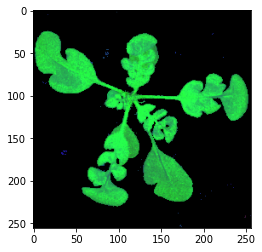

In [11]:
plt.imshow(greens[3800][0])

In [13]:
import random
random.shuffle(greens)
x,y=zip(*greens)

In [16]:
y=le.fit_transform(y)
from tensorflow.keras.utils import to_categorical
y=to_categorical(y)


In [18]:
x=np.reshape(x,(-1,256,256,3))

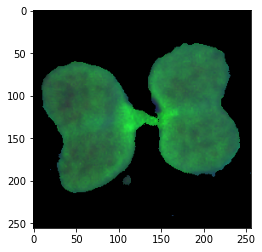

In [19]:
plt.imshow(x[-1])

In [21]:
xtr=x[:3800]
xtest=x[3800:]
ytr=y[:3800]
ytest=y[3800:]

In [23]:
model=tf.keras.Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(256,256,3)))
#model.add(layers.Conv2D(64,(3,3),activation='relu',strides=3))
model.add(layers.Conv2D(128,(3,3),activation='relu',strides=4))
model.add(layers.MaxPool2D((2,2),strides=2))
model.add(layers.Conv2D(384,(3,3),padding='same',activation='relu'))
model.add(layers.Conv2D(384,(3,3),padding='same',activation='relu'))
model.add(layers.Conv2D(256,(3,3),padding='same',activation='relu'))
#model.add(layers.Conv2D(256,(3,3),padding='same',activation='relu'))
model.add(layers.MaxPool2D((3,3),strides=3))
model.add(layers.Flatten())
model.add(layers.Dense(4096,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4096,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(12,activation='softmax'))

In [24]:
from tensorflow.keras.optimizers import SGD,RMSprop,Adam
rms=RMSprop(learning_rate=1e-5,momentum=0.001)
sgd=SGD(momentum=0.001,nesterov=True)
adam=Adam(lr=1e-5)

In [25]:
model.compile(optimizer=rms,loss='categorical_crossentropy',metrics='accuracy')

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 64, 128)       3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 384)       442752    
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 384)       1327488   
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 256)       884992    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 256)       0

In [ ]:
hist=model.fit(xtr,ytr,validation_data=(xtest,ytest),epochs=50,batch_size=16)

Epoch 1/50
238/238 [==============================] - 42s 177ms/step - loss: 2.3957 - accuracy: 0.1600 - val_loss: 2.2543 - val_accuracy: 0.2137
Epoch 2/50
238/238 [==============================] - 49s 204ms/step - loss: 2.1667 - accuracy: 0.2484 - val_loss: 1.9641 - val_accuracy: 0.3442
Epoch 3/50
238/238 [==============================] - 51s 213ms/step - loss: 1.8939 - accuracy: 0.3734 - val_loss: 1.6152 - val_accuracy: 0.4674
Epoch 4/50
238/238 [==============================] - 52s 218ms/step - loss: 1.6218 - accuracy: 0.4424 - val_loss: 1.4599 - val_accuracy: 0.5147
Epoch 5/50
238/238 [==============================] - 52s 217ms/step - loss: 1.5068 - accuracy: 0.4692 - val_loss: 1.3968 - val_accuracy: 0.5242
Epoch 6/50
238/238 [==============================] - 51s 216ms/step - loss: 1.4268 - accuracy: 0.4942 - val_loss: 1.3328 - val_accuracy: 0.5463
Epoch 7/50
238/238 [==============================] - 51s 213ms/step - loss: 1.3757 - accuracy: 0.5132 - val_loss: 1.3080 - val_ac

In [ ]:
plt.plot(hist.history['accuracy'],label='accuracy')
plt.plot(hist.history['val_accuracy'],label='val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('adam50,lre-5,dp12 0.5 0.2',color='white',fontsize=20)
plt.legend()

In [ ]:
plt.plot(hist.history['loss'],label='loss')
plt.plot(hist.history['val_loss'],label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('adam50,lre-5,dp12 0.5 0.2',color='white',fontsize=20)
plt.legend()

In [ ]:
testpath='D:/datasets/plant-seedlings-classification/test/'

In [ ]:
def gettestimgs():
    testds=[]
    #for i in classes:
    for j in (glob(testpath+'/*')):
        img=cv2.imread(j)
        img=cv2.resize(img,(256,256))
        green=greenmask(img)
        testds.append(green)
    return testds

In [ ]:
plt.imshow(cv2.imread(glob(testpath+'/*')[0],cv2.IMREAD_COLOR))

In [ ]:
testds=gettestimgs()

In [ ]:
testds

In [ ]:
testd=np.reshape(testds,(-1,256,256,3))

In [ ]:
predictions=model.predict(testd,batch_size=32,verbose=5)

In [ ]:
def gethot(y):
    hots=[]
    for i in predictions:
        hots.append(np.argmax(i))
    return hots

In [ ]:
hot=gethot(predictions)

In [ ]:
hots=le.inverse_transform(hot)

In [ ]:
final=zip(os.listdir(testpath),hots)

In [ ]:
a=[]
for i,j in final:
    a.append([i,j])

In [ ]:
a

In [ ]:
find=pd.DataFrame(data=((a)),columns=['file','species'])

In [ ]:
find

In [ ]:
find.to_csv('plants.csv')